# MLT COMP3222 Coursework

## Project Setup
The following section sets up the needed component of the project.
The first cell imports the needed libraries for the rest of the project.
The second cell imports the txt files and converts them into panda dataframes.
The remaining cells are use check that the import is successful.

In [1]:
# Import Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Import libraries for tweetText language detection
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Import libraries for data analysis
import re
from dateutil import parser
from scipy.stats import ks_2samp

# Importing Libraries for text processing
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk import Tree

# Importing Libraries for translation
from langdetect import detect
from googletrans import Translator

# Importing Libraries for data selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Importing libraries for model building
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for model evaluation

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing the training dataset
training_data = pd.read_table("DataSet\mediaeval-2015-trainingset.txt",skiprows=(0),  header=0, sep="\t",lineterminator='\n',  quoting=csv.QUOTE_NONE)
# Importing the testing dataset
testing_data = pd.read_table("DataSet\mediaeval-2015-testset.txt",skiprows=(0),  header=0, sep="\t",lineterminator='\n', quoting=csv.QUOTE_NONE)


In [3]:
# Checking the training data has been imported correctly
training_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [4]:
# Checking the testing data has been imported correctly
testing_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,"""@ebonfigli: Éclipse vue de l'ISS... Autre cho...",1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake


## Data Analysis
The following segment composes the data analysis of the project. Initally broad, general data analysis is conducted. After this the individual columns are investigated if they are deemd to possibly have useful infomation.

In [5]:
# Getting basic infomation about the training data
training_data.info()
# 14483 rows and 7 columns: tweet_id, user_id, tweet_text, image_id(s), username, timestamp, label
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14483 entries, 0 to 14482
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14483 non-null  int64 
 1   tweetText   14483 non-null  object
 2   userId      14483 non-null  int64 
 3   imageId(s)  14483 non-null  object
 4   username    14483 non-null  object
 5   timestamp   14483 non-null  object
 6   label       14483 non-null  object
dtypes: int64(2), object(5)
memory usage: 792.2+ KB


In [6]:
# Getting basic infomation about the testing data
testing_data.info()
# 3781 rows and 7 columns: tweet_id, user_id, tweet_text, image_id(s), username, timestamp,label
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3781 non-null   int64 
 1   tweetText   3781 non-null   object
 2   userId      3781 non-null   int64 
 3   imageId(s)  3781 non-null   object
 4   username    3781 non-null   object
 5   timestamp   3781 non-null   object
 6   label       3781 non-null   object
dtypes: int64(2), object(5)
memory usage: 206.9+ KB


In [7]:
# Counting the number of different labels in the training data
training_counts = training_data['label'].value_counts()
training_counts

label
fake     6841
real     5009
humor    2633
Name: count, dtype: int64

In [8]:
# Counting the number of different labels in the testing data
testing_counts = testing_data['label'].value_counts()
testing_counts

label
fake    2564
real    1217
Name: count, dtype: int64

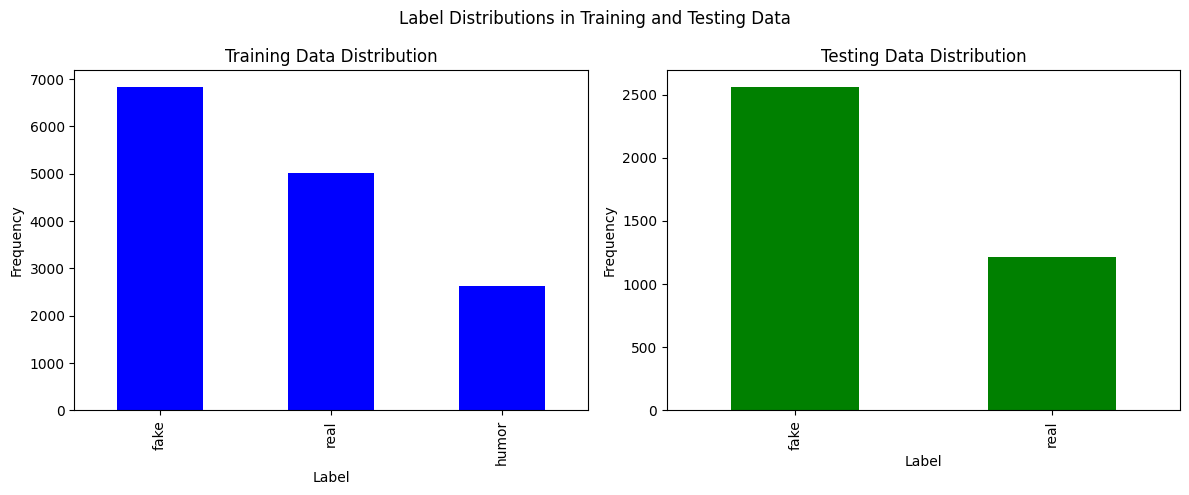

In [9]:
# The following code is used to plot the distribution of the labels in the training and testing data (the number of tweets for fake, real and humor)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Training Data Label Distribution
training_data['label'].value_counts().plot(kind='bar', ax=axes[0], title='Training Data Distribution', color='blue')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

# Plot Testing Data Label Distribution
testing_data['label'].value_counts().plot(kind='bar', ax=axes[1], title='Testing Data Distribution', color='green')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Frequency')

# Add a title to the figure
plt.suptitle('Label Distributions in Training and Testing Data')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [10]:
# The following code creates a new_label column in the training and testing data frame
# This column shows the wanted output labels of the project with fake and humour tweets being 1 and real tweets being 0
# NOTE: This does not change the original label column and all the original data is still intact. This is only done to see the distribution of the wanted output labels 
training_data['new_label'] = training_data['label'].apply(lambda x: 1 if x in ['fake', 'humor'] else 0)
testing_data['new_label'] = testing_data['label'].apply(lambda x: 1 if x in ['fake', 'humor'] else 0)


In [11]:
# Counting the number new_labels in the training data
# This shows the distribution of the wanted output labels (this is not done for the testing data as the new_label values are not different from the original labels)
training_counts = training_data['new_label'].value_counts()
training_counts

new_label
1    9474
0    5009
Name: count, dtype: int64

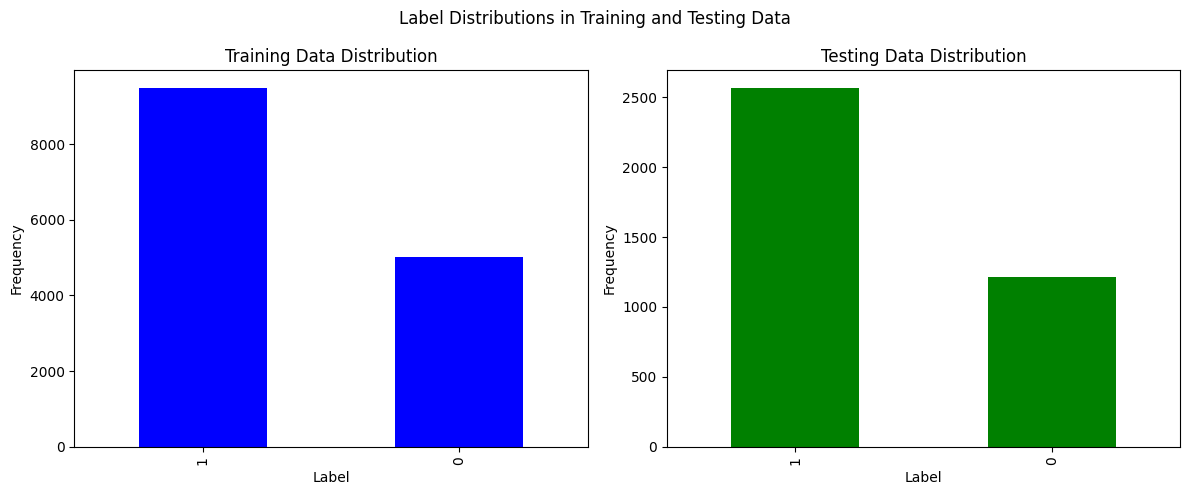

In [12]:
# Similar to the above plotting code the following code plots the new_label distribution in the training and testing data.
# This is done to see the distribution of the wanted output labels
# NOTE: The second graph is the same as the previous graph collection just with different labels since the testing set only has 2 labels originally 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Training Data Distribution
training_data['new_label'].value_counts().plot(kind='bar', ax=axes[0], title='Training Data Distribution', color='blue')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

# Plot Testing Data Distribution
testing_data['new_label'].value_counts().plot(kind='bar', ax=axes[1], title='Testing Data Distribution', color='green')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Frequency')

# Add a title to the figure
plt.suptitle('Label Distributions in Training and Testing Data')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

### Username
The following section investigates the username column in the data. Although we cannot create an additional static data source from the training dataset for use with the testing dataset the model trained on the data would effectivly "remember" the usernames (as features) and the username length maybe a useful feature. 

In [13]:
# Investigating the number of unique users in the training data
training_data["username"].describe()

count           14483
unique          13684
top       SAGandAFTRA
freq               16
Name: username, dtype: object

In [14]:
# Investigating the number of unique users in the testing data
testing_data["username"].describe()

count           3781
unique          3578
top       _WTFVideos
freq              23
Name: username, dtype: object

In [15]:
# Getting the overlap of usernames between the training and testing data
# Get the unique usernames from the training_data and testing_data dataframes
training_usernames = set(training_data['username'])
testing_usernames = set(testing_data['username'])

# Finding the overlapping usernames
overlapping_usernames = training_usernames.intersection(testing_usernames)

# Get the count of overlapping usernames
num_overlapping_usernames = len(overlapping_usernames)

# Printing the result
print(f"The number of overlapping usernames between training_data and testing_data is: {num_overlapping_usernames}")
# Only 7 overlapping usernames between the training and testing data so this is not useful for the project


The number of overlapping usernames between training_data and testing_data is: 7


In [16]:
# Checking to see if username length is a good feature to use for the project

# Calculate average username length for fake/humor labels in training data
fake_humor_train_avg_length = training_data[training_data['new_label'] == 1]['username'].str.len().mean()

# Calculate average username length for real labels in training data
real_train_avg_length = training_data[training_data['new_label'] == 0]['username'].str.len().mean()

# Calculate average username length for fake/humor labels in testing data
fake_humor_test_avg_length = testing_data[testing_data['new_label'] == 1]['username'].str.len().mean()

# Calculate average username length for real labels in testing data
real_test_avg_length = testing_data[testing_data['new_label'] == 0]['username'].str.len().mean()

# Print the results
print(f"Average username length for fake/humor labels in training data: {fake_humor_train_avg_length:.2f}")
print(f"Average username length for real labels in training data: {real_train_avg_length:.2f}")
print(f"Average username length for fake/humor labels in testing data: {fake_humor_test_avg_length:.2f}")
print(f"Average username length for real labels in testing data: {real_test_avg_length:.2f}")
# The average username length is very similar for real and fake labels in both the training and testing data so this is not useful for the project


Average username length for fake/humor labels in training data: 10.78
Average username length for real labels in training data: 10.58
Average username length for fake/humor labels in testing data: 10.33
Average username length for real labels in testing data: 10.94


### TweetText Analysis
TweetText is analysed in the following cells, with the code investigatin the number of duplicates, retweets and length of the tweets, as well as other relevant metrics. Since tweetText is the largest provided datasource lots of investigation is undergone.


In [17]:
# Counting the nuumber of tweets in the training data and the number of these which are unique
training_data["tweetText"].describe()
# 14483 tweets in the training data
# 12542 unique tweets in the training data
# 1941 tweets are duplicates in the training data

count                                                 14483
unique                                                12542
top       Unbelievable scene flying over #StatenIsland i...
freq                                                     42
Name: tweetText, dtype: object

In [18]:
# The following code is used to find the number of tweets in the training data which are retweets
# This can be found useing the regex pattern below which finds retweet markers such as "rt" and "via", commonly found in retweets
# Source: https://stackoverflow.com/questions/655903/python-regular-expression-for-retweets
combined_pattern = r"(RT|rt|MT|mt|RP|rp):? @\w*:?|\bRT\b|\brt\b|\bMT\b|\bmt\b|\bRP\b|\brp\b|@\w*:|#rt|#RT|#mt|#MT|#rp|#retweet|#Retweet|#modifiedtweet|#modifiedTweet|#ModifiedTweet|#repost|#Repost|via @\w*"

# Count the number of rows that match the regex pattern
count = len(training_data[training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE, regex=True)])

# Print the result
print(f"The number of rows with the specified regex pattern in the tweetText column is: {count}")
# It is found that 2881 in the training data are retweets
# Means that 12542 - 2881 = 9661 unique tweets in the training data

C:\Users\jimmy\AppData\Local\Temp\ipykernel_10144\1403625647.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = len(training_data[training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE, regex=True)])


The number of rows with the specified regex pattern in the tweetText column is: 2881


### TweetText Length


In [19]:
# The following code is used to find basic statistics about the length of the tweets in the training data
training_data['length'] = training_data['tweetText'].str.len()
training_data["length"].describe()
# The average length of the tweets in the training data is 89 characters
# The min is 26 and the max is 237 characters

count    14483.000000
mean        89.053994
std         33.012914
min         26.000000
25%         61.000000
50%         88.000000
75%        119.000000
max        237.000000
Name: length, dtype: float64

In [20]:
# Exploration of the longest tweet in the training data to see if it full of text or other, less useful characters
longest_tweet = training_data.loc[training_data['length'].idxmax(), 'tweetText']
print(longest_tweet)
# It is found that the longest tweet is a retweet so will be removed later on. Therefore removing long tweets is not necessary

This can't be real...RT @ropgrady: \355\240\275\355\270\263\355\240\275\355\270\263\355\240\275\355\270\263 #wtf #hurricane #sandy #nyc #statueofliberty #waves \355\240\274\355\274\212\355\240\275\355\267\275⚡☔ @ NYC http://t.co/CiWRW36n


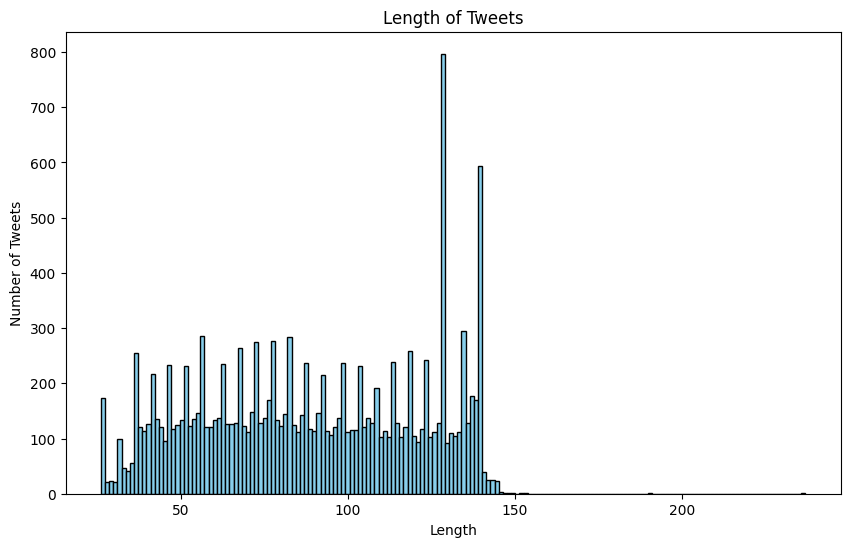

In [21]:
# Create a plot of the lengths of tweets in the training data to see the distribution of the lengths

# Create a histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(training_data['length'], bins=170, color='skyblue', edgecolor='black') 
plt.title('Length of Tweets')
plt.xlabel('Length')
plt.ylabel('Number of Tweets')
plt.show()

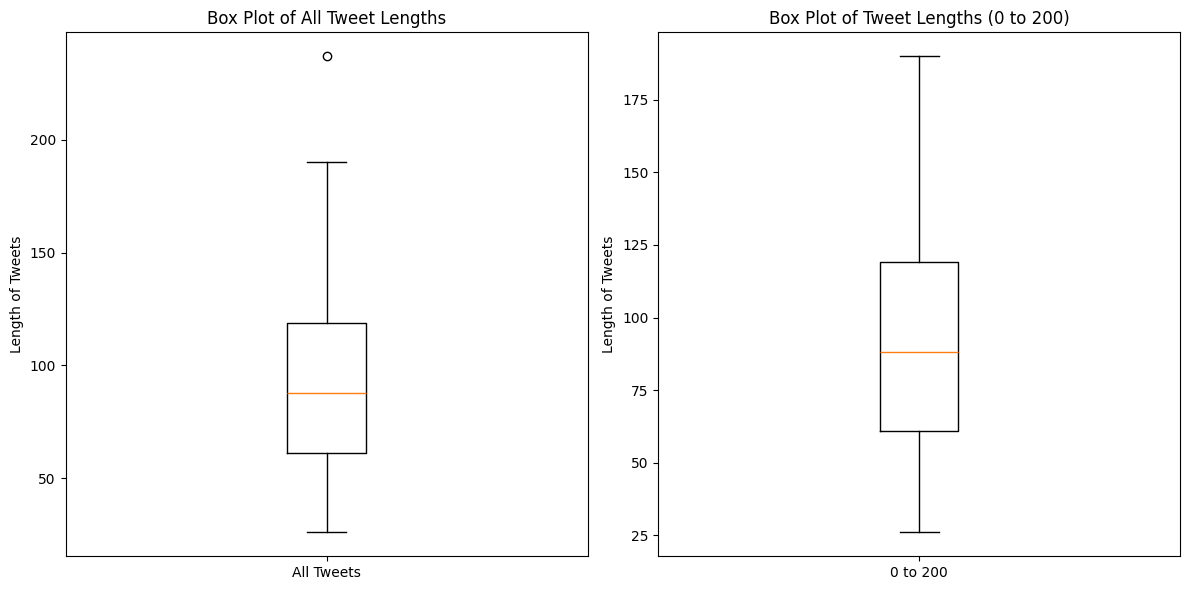

In [22]:
# A box plot is also created to see the distribution of the lengths of the tweets in the training data
# This is created alongside the bar chart to see how bad the outliers are

# Calculate the length of each tweet
training_data['length'] = training_data['tweetText'].str.len()

# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for all tweet lengths
axes[0].boxplot(training_data['length'])
axes[0].set_title('Box Plot of All Tweet Lengths')
axes[0].set_ylabel('Length of Tweets')
axes[0].set_xticklabels(['All Tweets'])

# Filter the data for lengths from 0 to 200
filtered_data = training_data[training_data['length'] <= 200]

# Box plot for filtered tweet lengths (0 to 200)
axes[1].boxplot(filtered_data['length'])
axes[1].set_title('Box Plot of Tweet Lengths (0 to 200)')
axes[1].set_ylabel('Length of Tweets')
axes[1].set_xticklabels(['0 to 200'])

# Show the plot
plt.tight_layout()
plt.show()

# Plot shows that only one tweet is over 200 characters long so this is not a problem for the project (since this is a retweet it will be removed later on)


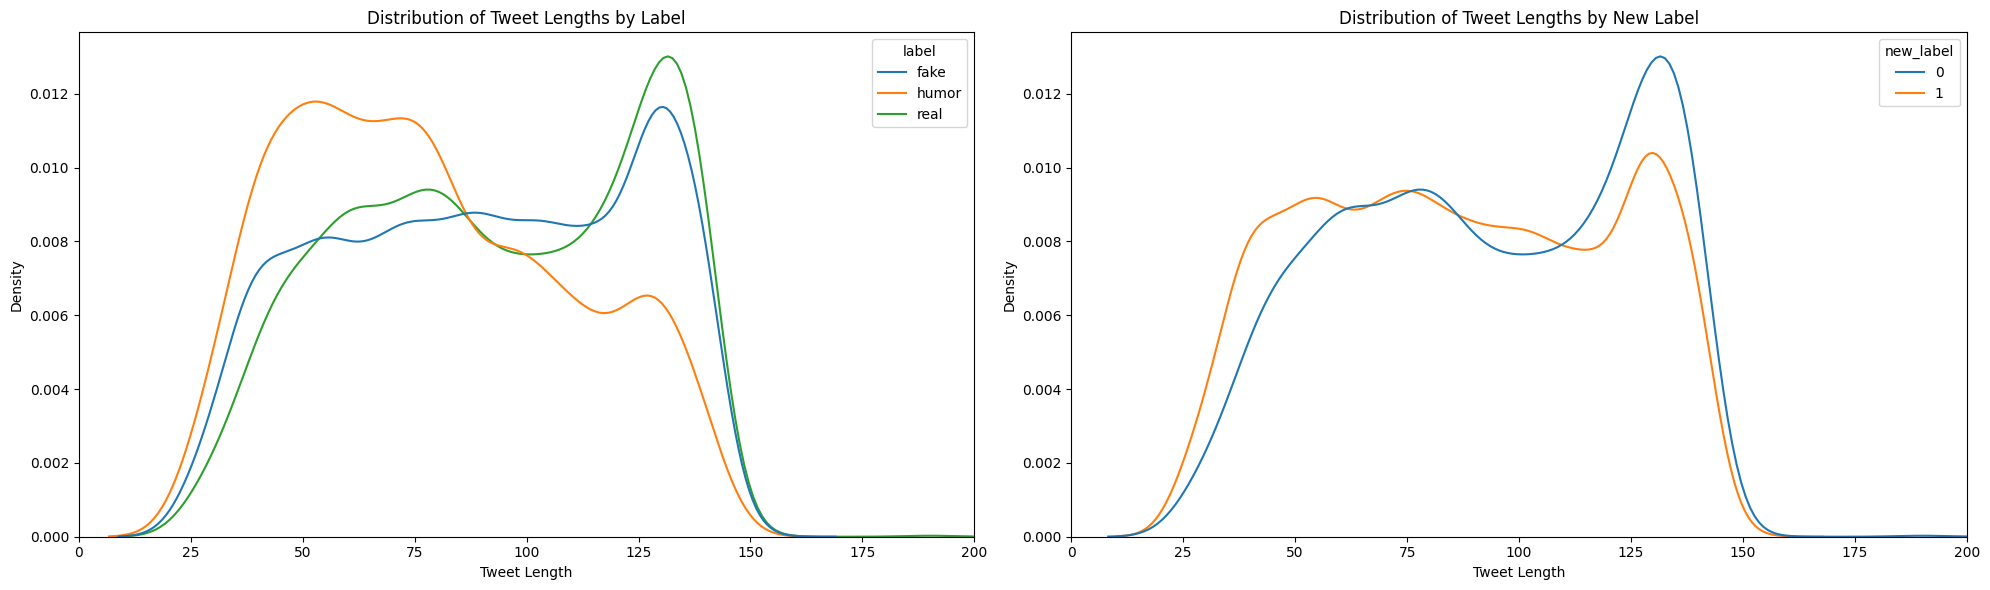

In [23]:
# Using seaborn graphs to create a graph in which the distribution of the tweet lengths can be seen for the different labels in the training data
# First graph shows the old labels and the second graph shows the new labels compared to their tweet lenths
# NOTE: Matplotlib is not used for this due to difficulties in creating such a graph 

# Filtering the data to include only lengths from 0 to 200. This is done to remove the outliers and make the graph more useful for visualisation
filtered_data = training_data[training_data['length'] <= 200]

# Setting up a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plotting the KDE plot for the 'label' column
sns.kdeplot(data=filtered_data, x='length', hue='label', common_norm=False, ax=axes[0])
axes[0].set_title('Distribution of Tweet Lengths by Label')
axes[0].set_xlabel('Tweet Length')
axes[0].set_ylabel('Density')
axes[0].set_xlim(0, 200)

# Plotting the KDE plot for the 'new_label' column
sns.kdeplot(data=filtered_data, x='length', hue='new_label', common_norm=False, ax=axes[1])
axes[1].set_title('Distribution of Tweet Lengths by New Label')
axes[1].set_xlabel('Tweet Length')
axes[1].set_ylabel('Density')
axes[1].set_xlim(0, 200)

plt.tight_layout()
plt.show()
# The graphs show that the distribution of the tweet lengths is very similar for the different labels in the training data
# Humour is different to the other labels but when combined with fake it is very similar to the real label

In [24]:
# The following code is used to do statistical analysis on the tweet lengths for the different labels in the training data
# This is done to see if the tweet length is a good feature to use for the project

# Separate the tweet lengths for the different labels
group_0 = training_data[training_data['new_label'] == 0]['length']
group_1 = training_data[training_data['new_label'] == 1]['length']

# Perform the KS test
ks_statistic, p_value = ks_2samp(group_0, group_1)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")
# The ks statistic is 0.07 which shows that the distributions are not very different
# The p-value is 0.0 which shows that the distributions are different
# Overall it shows that the tweet length is not a good feature to use for the project since the distributions are very similar and not different enough

KS Statistic: 0.07608843663419777
P-Value: 6.035152553637675e-17


#### Language of TweetText


In [25]:
# The following code is used to find the language of the tweets in the datasets
# The language code , such as "en", for each row is stored in a new column called "lang"
# This is done to see if language is a good feature to use for the project/ to see if translation is needed for the project

# Set seed for langdetect to get consistent results
DetectorFactory.seed = 0

# Define a function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Apply the function to the tweetText column and store results in "lang" column
training_data['lang'] = training_data['tweetText'].apply(detect_language)
testing_data['lang'] = testing_data['tweetText'].apply(detect_language)

# Check the results
print(training_data.head())


              tweetId                                          tweetText  \
0  263046056240115712  ¿Se acuerdan de la película: “El día después d...   
1  262995061304852481  @milenagimon: Miren a Sandy en NY!  Tremenda i...   
2  262979898002534400  Buena la foto del Huracán Sandy, me recuerda a...   
3  262996108400271360     Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4  263018881839411200  My fave place in the world #nyc #hurricane #sa...   

      userId      imageId(s)        username                       timestamp  \
0   21226711  sandyA_fake_46         iAnnieM  Mon Oct 29 22:34:01 +0000 2012   
1  192378571  sandyA_fake_09  CarlosVerareal  Mon Oct 29 19:11:23 +0000 2012   
2  132303095  sandyA_fake_09     LucasPalape  Mon Oct 29 18:11:08 +0000 2012   
3  241995902  sandyA_fake_29     Haaaaarryyy  Mon Oct 29 19:15:33 +0000 2012   
4  250315890  sandyA_fake_15  princess__natt  Mon Oct 29 20:46:02 +0000 2012   

  label  new_label  length lang  
0  fake          1     134  

In [26]:
# Counting the number of tweets in the training data for each language
training_data['lang'].value_counts()
# Of the tweets, 11142 are english while the remaining are a combination of 20 other languages, mainly spanish

lang
en         11142
es          1307
tl           325
fr           223
id           177
pt           161
so           128
de           126
it           102
cy            97
nl            91
ar            80
af            70
ru            60
sv            47
pl            40
no            38
tr            34
ca            33
da            23
ja            21
th            19
et            14
fi            13
sk            13
vi            12
bg            10
zh-cn         10
sw             9
sl             8
lt             8
ro             7
hu             6
ko             6
el             5
hr             5
fa             3
sq             3
cs             2
mk             1
hi             1
he             1
unknown        1
lv             1
Name: count, dtype: int64

In [27]:
# Counting the number of tweets in the testing data for each language
testing_data['lang'].value_counts()
# Of the tweets, 2721 are english while the remaining are a combination of 20+ other languages, mainly spanish

lang
en    2721
so     596
ar     172
es      64
de      41
pt      39
fr      33
nl      21
it      17
tr      13
ca      11
id       7
cy       5
hi       5
fi       4
af       4
sq       4
el       3
tl       3
te       2
th       2
vi       2
ja       2
pl       2
ru       1
sv       1
ta       1
et       1
ko       1
bg       1
hr       1
lt       1
Name: count, dtype: int64

In [28]:
# The following code displays the languages which are present in the testing set but not the training set
# For these languages, without translation the model would not have had any training data to learn from

# Get the unique languages in the training_data and testing_data dataframes
training_languages = set(training_data['lang'])
testing_languages = set(testing_data['lang'])

# Find the languages that occur in the testing_data but not in the training_data
languages_only_in_testing = testing_languages - training_languages

# Count the number of languages that occur in the testing_data but not in the training_data
num_languages_only_in_testing = len(languages_only_in_testing)

# List the languages that occur in the testing_data but not in the training_data
languages_list = list(languages_only_in_testing)

# Print the result
print(f"The number of languages that occur in the testing_data but not in the training_data is: {num_languages_only_in_testing}")
print(f"The languages that occur in the testing_data but not in the training_data are: {languages_list}")


The number of languages that occur in the testing_data but not in the training_data is: 2
The languages that occur in the testing_data but not in the training_data are: ['ta', 'te']


In [29]:
def count_lang_tweets_with_label_details(dataframe, lang_column='lang', label_column='new_label'):
    """
    Count the total number and the percentage of English and non-English tweets in a DataFrame, split by label.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the tweet data.
    lang_column (str): Name of the column containing language codes.
    label_column (str): Name of the column containing label.

    Returns:
    dict: A dictionary containing the counts and percentages of English and non-English tweets, split by label.
    """
    # Filter English and non-English tweets
    english_tweets = dataframe[dataframe[lang_column] == 'en']
    non_english_tweets = dataframe[dataframe[lang_column] != 'en']

    # Calculate percentages and counts for each label
    def calculate_details(series):
        total = series.sum()
        percentages = {label: (count / total * 100) for label, count in series.items()}
        return total, percentages

    total_en, en_label_details = calculate_details(english_tweets[label_column].value_counts())
    total_non_en, non_en_label_details = calculate_details(non_english_tweets[label_column].value_counts())

    return {
        'english': {'total': total_en, 'details': en_label_details},
        'non_english': {'total': total_non_en, 'details': non_en_label_details}
    }

# Example usage with training_data
details_training = count_lang_tweets_with_label_details(training_data)
print(f"Number of English tweets in training data: {details_training['english']['total']} (0: {details_training['english']['details'].get(0, 0):.2f}%, 1: {details_training['english']['details'].get(1, 0):.2f}%)")
print(f"Number of non-English tweets in training data: {details_training['non_english']['total']} (0: {details_training['non_english']['details'].get(0, 0):.2f}%, 1: {details_training['non_english']['details'].get(1, 0):.2f}%)")

# Example usage with testing_data
details_testing = count_lang_tweets_with_label_details(testing_data)
print(f"Number of English tweets in testing data: {details_testing['english']['total']} (0: {details_testing['english']['details'].get(0, 0):.2f}%, 1: {details_testing['english']['details'].get(1, 0):.2f}%)")
print(f"Number of non-English tweets in testing data: {details_testing['non_english']['total']} (0: {details_testing['non_english']['details'].get(0, 0):.2f}%, 1: {details_testing['non_english']['details'].get(1, 0):.2f}%)")



Number of English tweets in training data: 11142 (0: 37.26%, 1: 62.74%)
Number of non-English tweets in training data: 3341 (0: 25.65%, 1: 74.35%)
Number of English tweets in testing data: 2721 (0: 42.37%, 1: 57.63%)
Number of non-English tweets in testing data: 1060 (0: 6.04%, 1: 93.96%)


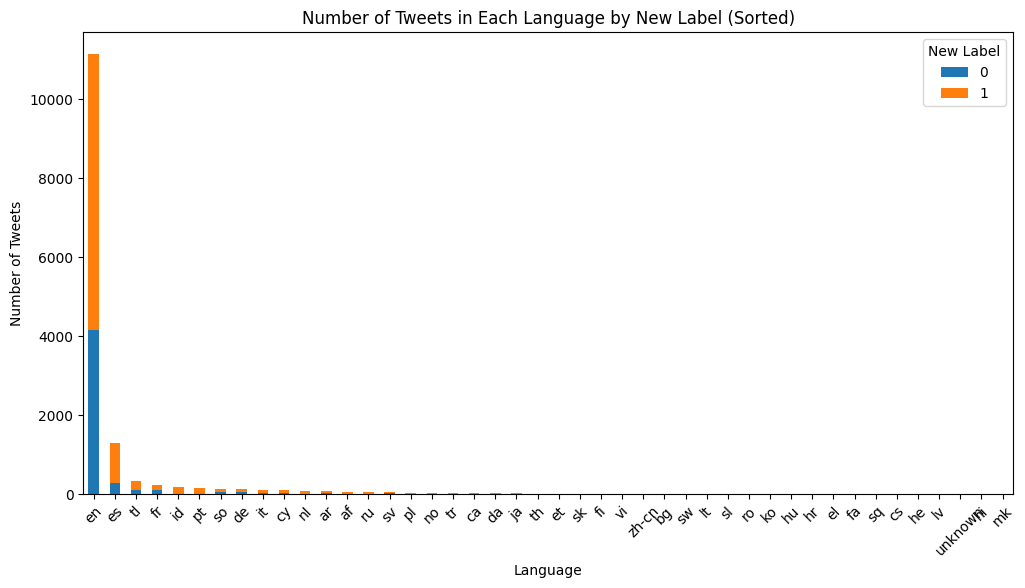

In [30]:
# Plotting the distribution of the langauges in the training data
# The percentage of each tweet that is 0 and 1 can also be seen on the graph
# Essentailly a combination of the previous cells, showning the distribution of the languages in the training data and distriution of label within each language

# Grouping the data by 'lang' and 'new_label' and counting the occurrences
grouped_language_counts = training_data.groupby(['lang', 'new_label']).size().unstack(fill_value=0)

# Calculate the total number of tweets for each language
grouped_language_counts['total'] = grouped_language_counts.sum(axis=1)

# Sort the DataFrame based on the total number of tweets
grouped_language_counts_sorted = grouped_language_counts.sort_values(by='total', ascending=False)

# Dropping the 'total' column as it's no longer needed in the plot
grouped_language_counts_sorted = grouped_language_counts_sorted.drop(columns='total')

# Plotting the sorted counts as a grouped bar plot
plt.figure(figsize=(12, 6))
grouped_language_counts_sorted.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Number of Tweets in Each Language by New Label (Sorted)')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.legend(title='New Label')
plt.show()

# The plot shows that the distribution of the languages is very similar for the different labels in the training data
# And that english is overwhelmingly the most common language in the training data

### Emojis 

In [31]:
# The following code is used to find the number of tweets in the training data which contain emojis
# This is done to see how common emojis are in the training data

def contains_emoji(s):
    # Source: https://stackoverflow.com/a/49146722
    # Creates a regex pattern to match emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    # Checks if the input string has any emojis
    return bool(emoji_pattern.search(s))

# Counting the number of rows with emojis
emoji_count = training_data['tweetText'].apply(contains_emoji).sum()

print(f"Number of rows with emojis: {emoji_count}")

# It shows that emojis are not very common but are still present in the training data


Number of rows with emojis: 888


In [32]:
# Checking to see how prevelant emojis are in the rows with emojis 
# Manual inspection of the results shows that emojis are not very common in the training data

# Filtering the DataFrame for rows with emojis
rows_with_emojis = training_data[training_data['tweetText'].apply(contains_emoji)]

# Displaying the first 10 rows that contain emojis
rows_with_emojis.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en
12,263091320871063552,#shark #newjersey #swim #sandy #hurricane  ...,51599800,sandyA_fake_11,anaceciggt,Tue Oct 30 01:33:53 +0000 2012,fake,1,66,en
22,263010650517807104,My cousin sent this to me... :: Cleveland voic...,101839785,sandyA_fake_25,Fcking_AWESOME,Mon Oct 29 20:13:20 +0000 2012,fake,1,125,en
26,263404091718389760,This is sooo cute! #puupy #dog #hurricane #san...,330337969,sandyA_fake_35,jennn619,Tue Oct 30 22:16:43 +0000 2012,fake,1,129,en
41,263066368713318400,UMMMM😳 #shark #hurricane #nj WOAHH http://t.co...,263410461,sandyA_fake_11,isaigraham,Mon Oct 29 23:54:44 +0000 2012,fake,1,55,sq
44,263079860778459136,uh #hurricane #sandy #wind #blowing #cloudy #w...,402783766,sandyA_fake_08,jamiesaunders95,Tue Oct 30 00:48:21 +0000 2012,fake,1,83,en
49,263092194703982593,😱 #shark #nyc #streets #sandy #hurricane http:...,51555122,sandyA_fake_05,josafatperez,Tue Oct 30 01:37:21 +0000 2012,fake,1,61,en
50,263677446304448512,A picture someone took of a shark swimming by ...,342294638,sandyA_fake_11,TheSergioB,Wed Oct 31 16:22:56 +0000 2012,fake,1,130,en
53,263107402868592640,#2012 #statueofliberty #NYC #world #ends #hurr...,585473986,sandyA_fake_06,mythicals1,Tue Oct 30 02:37:47 +0000 2012,fake,1,82,en
60,262964239646457856,#Hurricane #Sandy #NYC 🌀☔🗽 http://t.co/gNLZiF29,128002276,sandyA_fake_29,JoshTroyG,Mon Oct 29 17:08:55 +0000 2012,fake,1,47,en


### Uppercase Letters


In [33]:
# The following code inspects whether the proportion of uppercase letters in the tweets is a significantly different for the different labels in the training data

# Calculate the proportion of uppercase letters in real tweets
real_tweets = training_data[training_data['new_label'] == 0]['tweetText']
real_proportion = real_tweets.str.count(r'[A-Z]').sum() / real_tweets.str.len().sum()

# Calculate the proportion of uppercase letters in fake tweets
fake_tweets = training_data[training_data['new_label'] == 1]['tweetText']
fake_proportion = fake_tweets.str.count(r'[A-Z]').sum() / fake_tweets.str.len().sum()

# Print the results
print(f"Proportion of uppercase letters in real tweets: {real_proportion:.2%}")
print(f"Proportion of uppercase letters in fake tweets: {fake_proportion:.2%}")

# Both of the values are around 10.5% so this is not a good feature to use for the project

Proportion of uppercase letters in real tweets: 10.96%
Proportion of uppercase letters in fake tweets: 10.26%


## ImageIds Analysis
The imageIds describe the event currently being tweeted about and are the main focus in the original MediaEval 2015 challenge. As such the number of imageIds and their infomation will be looked at in the following cells after basic evaluation is conducted.

In [34]:
# The following code is used to find the number of duplicate imageIds in the training data
# And also to find the number of unique ones too

training_data["imageId(s)"].describe()

count              14483
unique               379
top       sandyA_fake_29
freq                1115
Name: imageId(s), dtype: object

In [35]:
# Counting the number of imageIds per row in the training data (imageIds is a comma separated list of imageIds) 

# Refactored helper function to add imageId quantity
def count_images_per_tweet(dataframe):
    # Count the number of imageIds in a comma separated list
    def count_images(image_ids):
        return 0 if pd.isna(image_ids) else len(str(image_ids).split(','))
    # Create a copy of the DataFrame to avoid modifying the original
    result_df = dataframe.copy()
    # Add a new column with the number of imageIds
    result_df['num_images'] = result_df['imageId(s)'].apply(count_images)
    return result_df

# Applying the refactored function to training_data
refactored_df = count_images_per_tweet(training_data)

# Counting the number of tweets for each number of images
count_per_image = refactored_df['num_images'].value_counts().sort_index()

# Printing the counts 
for image_count in count_per_image.index:
    print(f"Number of tweets with {image_count} images: {count_per_image[image_count]}")

# This shows that the majoirty of tweets only have one image so image count is not a good feature

Number of tweets with 1 images: 14354
Number of tweets with 2 images: 121
Number of tweets with 3 images: 6
Number of tweets with 4 images: 1
Number of tweets with 5 images: 1


In [36]:
# Manually inspecting the data to find the top 3 tweets with the most images
top_3_tweets = refactored_df.nlargest(3, 'num_images')
top_3_tweets


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,num_images
12964,325051231968059394,Share this. Possible suspect in Boston Bombing...,616188525,"boston_real_02,boston_real_03,boston_real_04,b...",the_guz_man,Fri Apr 19 01:00:27 +0000 2013,real,0,77,en,5
12765,325072170235617282,Unknown Suspect #2 Boston Bombing #FBI Wanted ...,19207243,"boston_real_01,boston_real_02,boston_real_05,b...",Ammidon,Fri Apr 19 02:23:39 +0000 2013,real,0,75,en,4
12553,324635274887970816,my best guess ala 4chan regarding Boston \nhtt...,109661488,"boston_fake_03,boston_fake_07,boston_fake_35",SOS3Today,Wed Apr 17 21:27:35 +0000 2013,fake,1,142,en,3


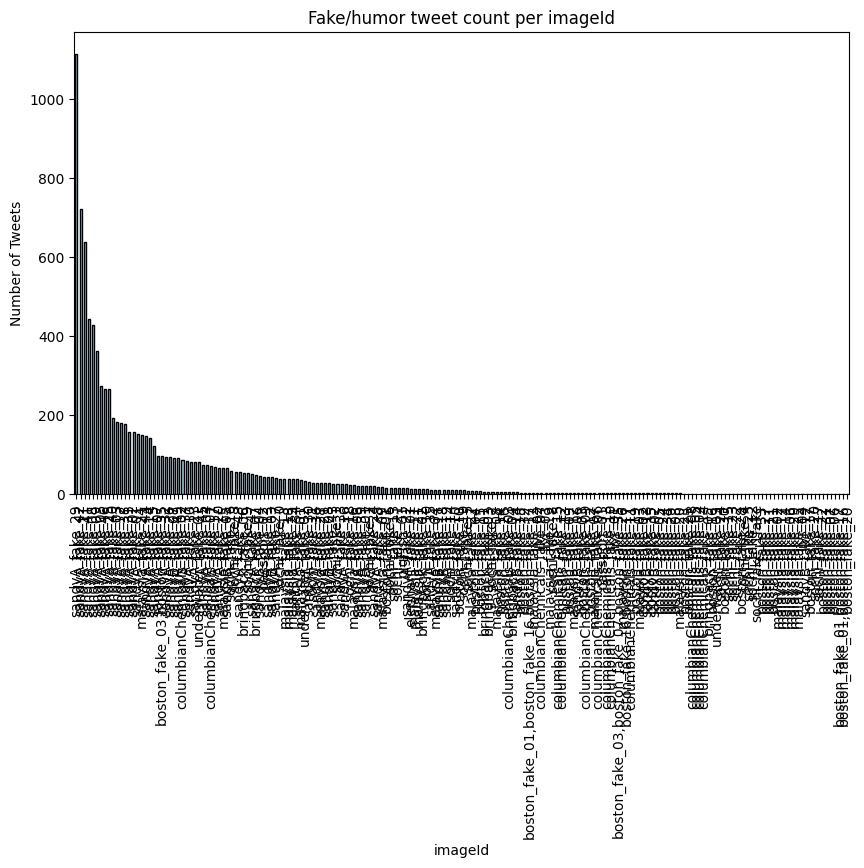

In [37]:
# Plotting the number of tweets using a certain imageId in the training data only for the fake tweets

# Filter the data to include only fake/humor tweets
fake_tweets = training_data[training_data['new_label'] == 1]

# Count the number of fake tweets per imageId
imageId_counts = fake_tweets['imageId(s)'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
imageId_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Fake/humor tweet count per imageId')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
# The plot shows that the majority of imageIds are only used a low amount of times


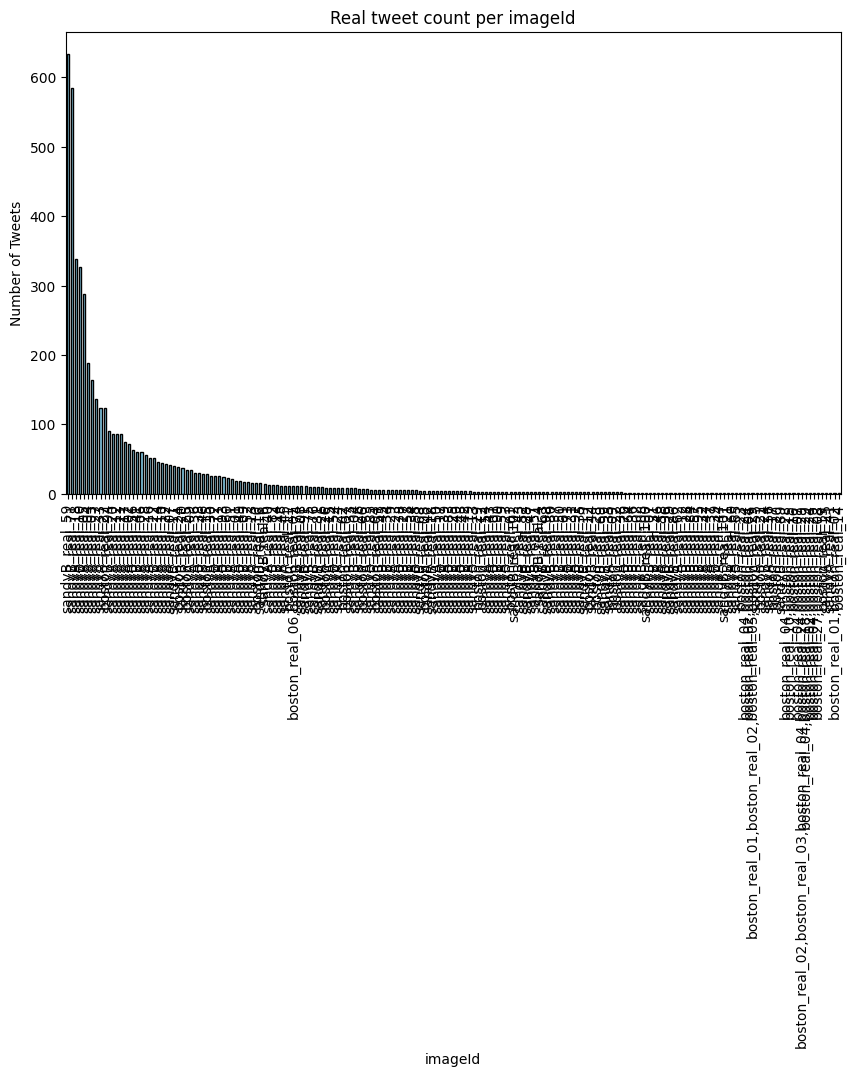

In [38]:
# The same as above but for the real tweets

# Filter the data to include only fake/humor tweets
fake_tweets = training_data[training_data['new_label'] == 0]

# Count the number of fake tweets per imageId
imageId_counts = fake_tweets['imageId(s)'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
imageId_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Real tweet count per imageId')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# The plot shows that the ditribution of imageIds is very similar for the different labels in the training data

In [39]:
# Since the number of different imageIds is huge , plotting the distribution of the imageIds is not super useful (we cant see the name of the imageIds)
# To fix this we shorten the imageIds to only include the first part of the imageId (before the first underscore)
# When this is done only the event the image is describing is shown and not the quirks of the imageId itself

# The following function remove the rest of the imageId after the first underscore and returns the shortened imageId to the list
def process_img_names(img_names):
    if isinstance(img_names, str):
        # Split each image name at the first underscore and take the first part
        processed_names = [img.split('_')[0] for img in img_names.split(',')]
        # Join the processed names back into a single string separated by commas
        return ','.join(processed_names)
    else:
        # Return empty string or NaN if the original value is not a string
        return ''

# Apply the function to the imgs column
training_data['short_imgs'] = training_data['imageId(s)'].apply(process_img_names)
testing_data['short_imgs'] = testing_data['imageId(s)'].apply(process_img_names)



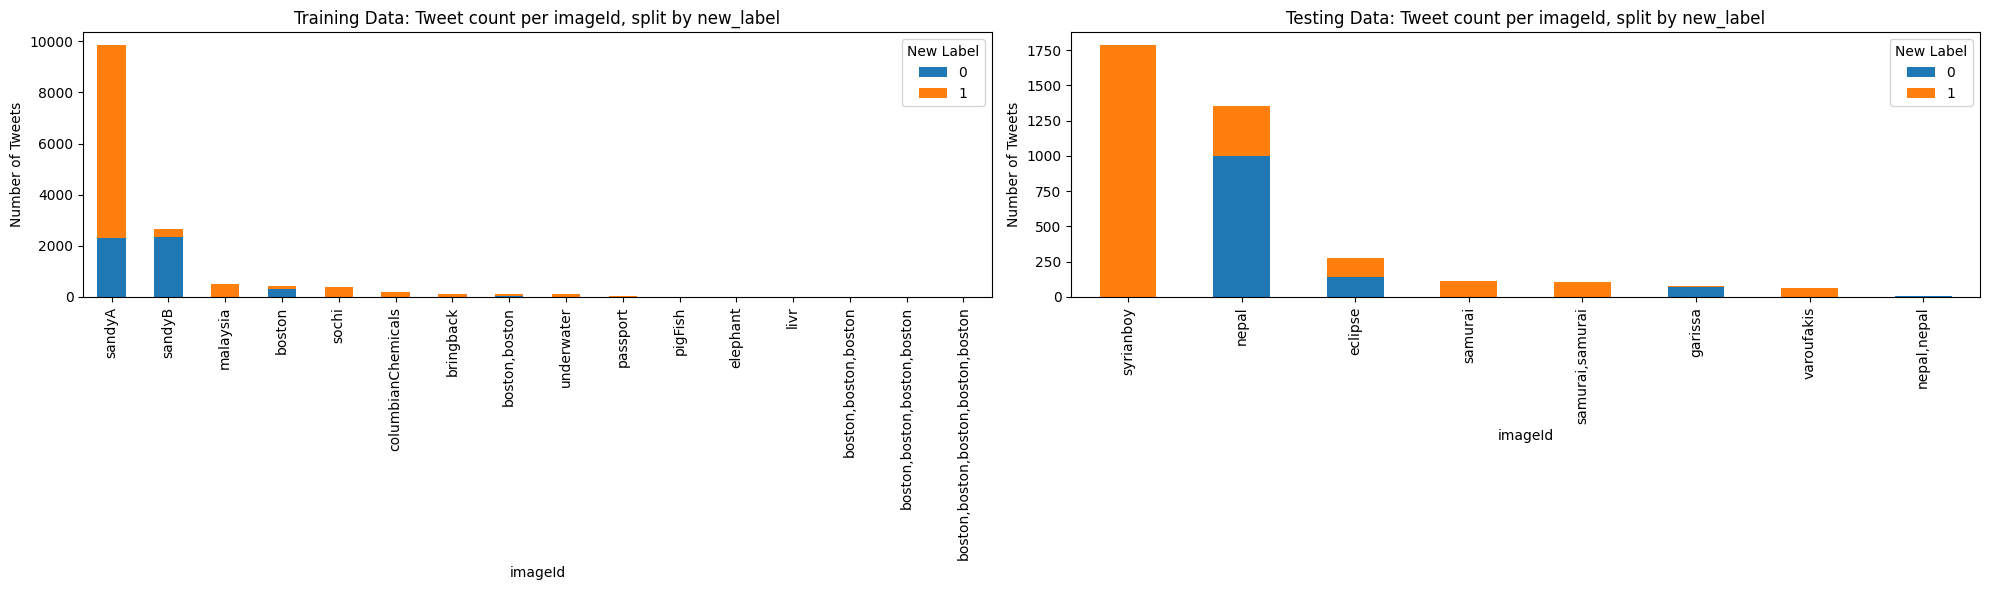

In [40]:
# Plotting the number of tweets using a certain imageId in the training data only for the both new labels
# The proportion of each label using each imageId can also be seen on the graph

# Group and count for training data
grouped_counts_train = training_data.groupby(['short_imgs', 'new_label']).size().unstack(fill_value=0)
grouped_counts_train['total'] = grouped_counts_train.sum(axis=1)
grouped_counts_sorted_train = grouped_counts_train.sort_values(by='total', ascending=False)
del grouped_counts_sorted_train['total']

# Group and count for testing data
grouped_counts_test = testing_data.groupby(['short_imgs', 'new_label']).size().unstack(fill_value=0)
grouped_counts_test['total'] = grouped_counts_test.sum(axis=1)
grouped_counts_sorted_test = grouped_counts_test.sort_values(by='total', ascending=False)
del grouped_counts_sorted_test['total']

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot for training data
grouped_counts_sorted_train.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Training Data: Tweet count per imageId, split by new_label')
axes[0].set_xlabel('imageId')
axes[0].set_ylabel('Number of Tweets')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='New Label')

# Plot for testing data
grouped_counts_sorted_test.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Testing Data: Tweet count per imageId, split by new_label')
axes[1].set_xlabel('imageId')
axes[1].set_ylabel('Number of Tweets')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='New Label')

plt.tight_layout()
plt.show()
# The plot show that there is no overlap between the events convered by the imageIds in the training and testing data
# This means that the model will not be able to learn from the imageIds in the training data and apply this to the testing data


### Time Stamp Analysis
The following cells analyse the timestamp column of the dataset. After basic exploration of the column, explortion of day of the week, dates and hours of the day are undergone to see if there is a relationship between the time the post was sent and its label.

In [41]:
# The following code converts the unstandardised timestamps in the training and testing data to standardised timestamps

# Define a custom function to handle the datetime conversion
def parse_datetime(dt_string):
    try:
        return parser.parse(dt_string)
    except ValueError:
        return pd.NaT  # Return 'Not a Time' for unparseable formats

# Apply this function to the 'timestamp' column
training_data['date'] = training_data['timestamp'].apply(parse_datetime)
testing_data['date'] = testing_data['timestamp'].apply(parse_datetime)

# Check the results
training_data.head()


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,1,133,es,sandyA,2012-10-29 19:11:23+00:00
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00


In [42]:
# Exploartion of the timestamps in the training data to see if they are a good feature to use for the project
# The following cells explore whether the days on which the posts are made are different for the different labels in the training data

# Extract the day of the week
training_data['day_of_week'] = training_data['date'].dt.day_name()

# Group by label and day_of_week and count occurrences
posts_per_day_label = training_data.groupby(['new_label', 'day_of_week']).size().unstack(fill_value=0)

# Reordering the columns to have days in order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
posts_per_day_label = posts_per_day_label[days_order]

# Print the result
print(posts_per_day_label)



day_of_week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
new_label                                                                  
0               527     1379        278       911     719       495     700
1              3235     3060        585      1093     682       404     392


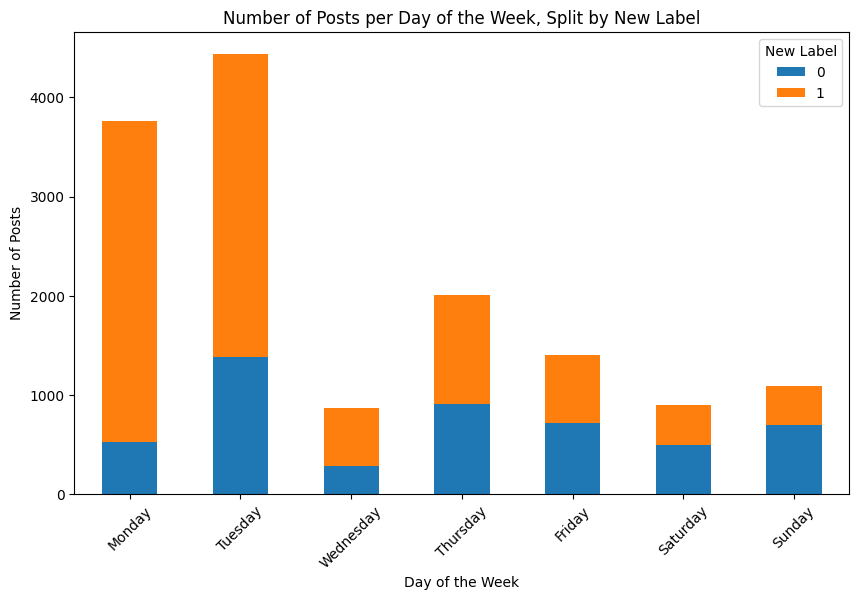

In [43]:
# Plotting the number of tweets posted on each day of the week in the training data for the different labels
# The proportion of each label using each day can also be seen on the graph
# This is to see if days of post has an effect on the label

# Group by day_of_week and new_label and count occurrences
posts_per_day_new_label = training_data.groupby(['day_of_week', 'new_label']).size().unstack(fill_value=0)

# Reordering the index to have days in order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
posts_per_day_new_label = posts_per_day_new_label.reindex(days_order)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
posts_per_day_new_label.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Number of Posts per Day of the Week, Split by New Label')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='New Label', loc='upper right')
plt.show()


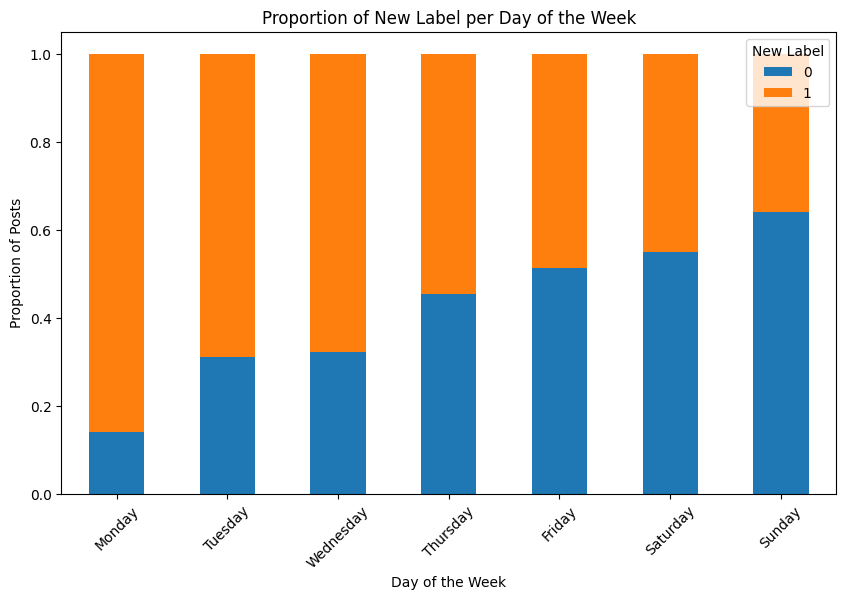

In [44]:
# Similar to the above cell but instead of total number of tweets the proportion of tweets is shown

# Group by day_of_week and new_label and count occurrences
posts_per_day_new_label = training_data.groupby(['day_of_week', 'new_label']).size().unstack(fill_value=0)

# Reordering the index to have days in order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
posts_per_day_new_label = posts_per_day_new_label.reindex(days_order)

# Normalize the counts to get proportions
posts_per_day_new_label_proportion = posts_per_day_new_label.div(posts_per_day_new_label.sum(axis=1), axis=0)

# Plotting the stacked bar chart with proportions
plt.figure(figsize=(10, 6))
posts_per_day_new_label_proportion.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Proportion of New Label per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Posts')
plt.xticks(rotation=45)
plt.legend(title='New Label', loc='upper right')
plt.show()

#The plot shows that the earlier in the week the post are the more likely it is to be fake/humor

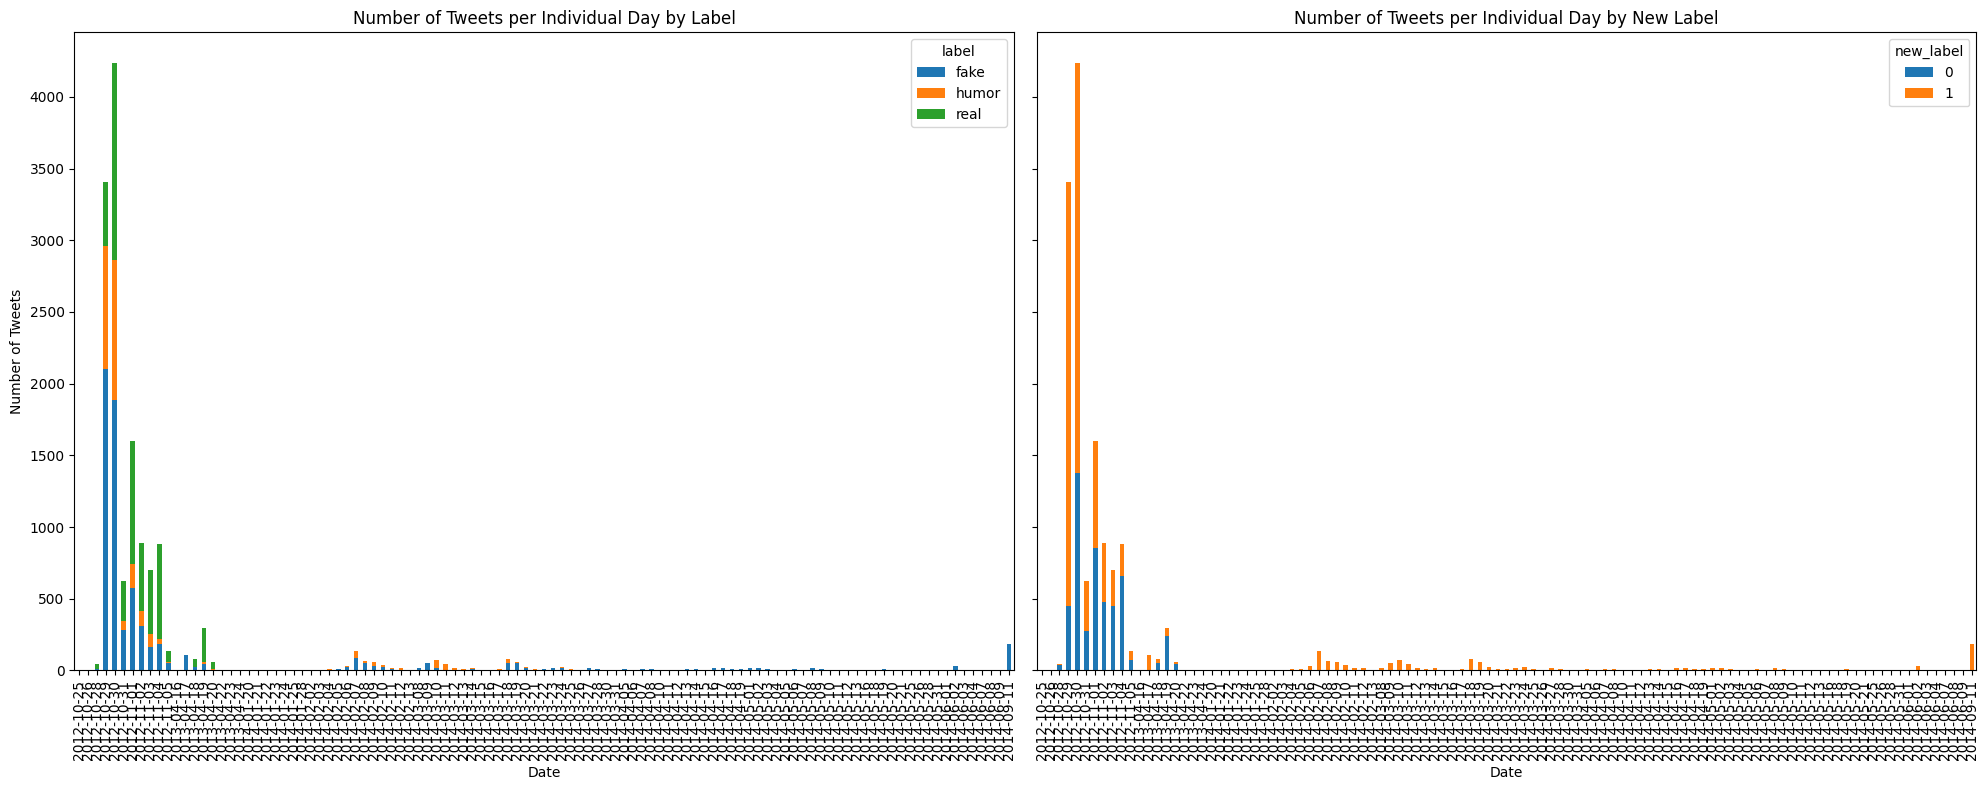

In [45]:
# The following code plots the number of tweets posted on each day of the dataset in the training data for the different labels
# The 2 different plots show the differnt labels, label and new_label

# Group the data by date and 'label'
posts_per_label = training_data.groupby([training_data['date'].dt.date, 'label']).size().unstack(fill_value=0)

# Group the data by date and 'new_label'
posts_per_new_label = training_data.groupby([training_data['date'].dt.date, 'new_label']).size().unstack(fill_value=0)

# Sort both DataFrames by date
posts_per_label.sort_index(inplace=True)
posts_per_new_label.sort_index(inplace=True)

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True)

# Plotting the stacked bar chart for 'label'
posts_per_label.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Number of Tweets per Individual Day by Label')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Tweets')
axes[0].tick_params(axis='x', rotation=90)

# Plotting the stacked bar chart for 'new_label'
posts_per_new_label.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Number of Tweets per Individual Day by New Label')
axes[1].set_xlabel('Date')
# axes[1].set_ylabel('Number of Tweets')  # Already shared with the first plot
axes[1].tick_params(axis='x', rotation=90)

# Set a tight layout and show the plot
plt.tight_layout()
plt.show()

# The plots show the reason for the large number of tweets on Monday and Tuesday shown in previous plots
# The majority of the tweets occur over a 2 day period in the training data (Monday and Tuesday)
# This is inline with the hurricane sandy event which occured on around this time

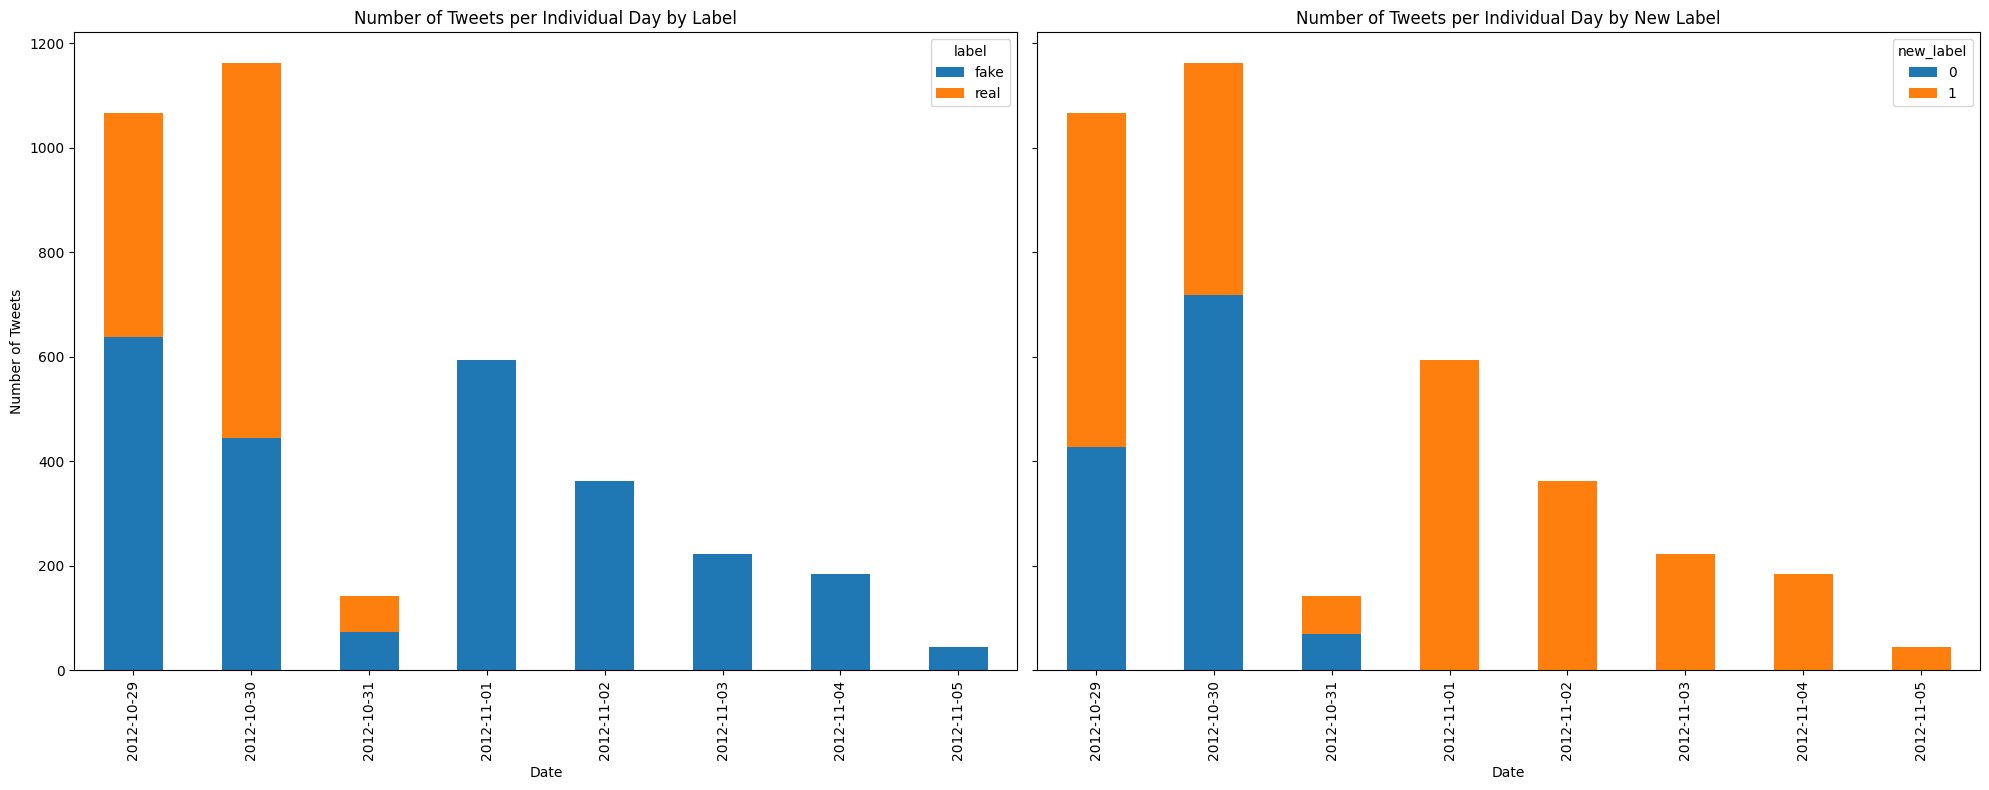

In [46]:
# The following code plots the number of tweets posted on each day of the dataset in the training data for the different labels
# The 2 different plots show the differnt labels, label and new_label

# Group the data by date and 'label'
posts_per_label = testing_data.groupby([training_data['date'].dt.date, 'label']).size().unstack(fill_value=0)

# Group the data by date and 'new_label'
posts_per_new_label = testing_data.groupby([training_data['date'].dt.date, 'new_label']).size().unstack(fill_value=0)

# Sort both DataFrames by date
posts_per_label.sort_index(inplace=True)
posts_per_new_label.sort_index(inplace=True)

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True)

# Plotting the stacked bar chart for 'label'
posts_per_label.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Number of Tweets per Individual Day by Label')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Tweets')
axes[0].tick_params(axis='x', rotation=90)

# Plotting the stacked bar chart for 'new_label'
posts_per_new_label.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Number of Tweets per Individual Day by New Label')
axes[1].set_xlabel('Date')
# axes[1].set_ylabel('Number of Tweets')  # Already shared with the first plot
axes[1].tick_params(axis='x', rotation=90)

# Set a tight layout and show the plot
plt.tight_layout()
plt.show()

# The plots show the reason for the large number of tweets on Monday and Tuesday shown in previous plots
# The majority of the tweets occur over a 2 day period in the training data (Monday and Tuesday)
# This is inline with the hurricane sandy event which occured on around this time

## Data Preprocessing
Conducting all of the data preprocesssing needed to make efficient use of the data. The process goes through steps and in each step if the data is transformed it is stored in a seperate column to allow for useage of previous data.

In [47]:
# As mentioned in the analysis, roughly 3000 tweets are retweets
# The following code is used to remove these retweets from the training data

# The following regular expression pattern is used to find retweets using commonly used retweet markers such as "rt" and "via"
# Source: 
combined_pattern = r"(RT|rt|MT|mt|RP|rp):? @\w*:?|\bRT\b|\brt\b|\bMT\b|\bmt\b|\bRP\b|\brp\b|@\w*:|#rt|#RT|#mt|#MT|#rp|#retweet|#Retweet|#modifiedtweet|#modifiedTweet|#ModifiedTweet|#repost|#Repost|via @\w*"

# Filtering out tweets that contain the regex pattern
training_data = training_data[~training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE)]

# Reset the DataFrame index
training_data.reset_index(drop=True, inplace=True)

# Print new shape of DataFrame
print(training_data.shape)


(11602, 13)


C:\Users\jimmy\AppData\Local\Temp\ipykernel_10144\986733981.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  training_data = training_data[~training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE)]


In [48]:
# Applies basic preprocessing to the text
# This include the following steps:
# 1. Making the text lowercase
# 2. Removing the urls
# 3. Removing the @mentions
# 4. Removing the punctuations and other symbols such as emojis
# The results of this filtering is stored in a new column called 'cleanText' so the original data is still intact
def basicPreProcessing(text):
    # Making the text lowercase
    text = text.lower()

    # Removing the urls
    text = re.sub(r"http\S+", "", text)
    
    # Removing the @mentions
    text = re.sub(r"@\S+", "", text)

    # Removing the punctuations and other symbols
    text = re.sub(r'[^\w\s]|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U000024C2-\U0001F251]', '', text)


    return text

# Apply the function to the 'tweetText' column
training_data['cleanText'] = training_data['tweetText'].apply(basicPreProcessing)
testing_data['cleanText'] = testing_data['tweetText'].apply(basicPreProcessing)

# Check the results
training_data.head()



,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date,day_of_week,cleanText
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00,Monday,se acuerdan de la película el día después de m...
1,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00,Monday,buena la foto del huracán sandy me recuerda a ...
2,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00,Monday,scary shit hurricane ny
3,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00,Monday,my fave place in the world nyc hurricane sandy...
4,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,1,63,en,sandyA,2012-10-30 19:39:10+00:00,Tuesday,42nd time square nyc subway hurricane


In [49]:
# The following code is used to remove any duplicate tweets remaining in the training data
# This is done after basic preprocessing to ensure that the duplicate tweets are identical
training_data.drop_duplicates(subset=['cleanText'], keep='first', inplace=True, ignore_index = True)

# Checking the number of tweets in the training data after removing duplicates
training_data["cleanText"].describe()

count                                                  9202
unique                                                 9202
top       se acuerdan de la película el día después de m...
freq                                                      1
Name: cleanText, dtype: object

## Translation
The following section on translation was meant to take place here but due to computational limitation and the time it takes to translate everything it was commented out. Results are still good without it however.


In [50]:
#Creating a seperate dataframe with only tweetst that need translation for a more efficient translation process

# rows_that_need_translation = training_data[training_data['lang'] != 'en']
# rows_that_need_translation.head()

In [51]:
# The following code is one of many iteration at a translation function
# Originally the googletrans library was used but this was very slow and was rate limited
# I switched to the translate library but this was also slow and didnt work as well.

# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
# model = AutoModelForSeq2SeqLM.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

# def batch_translate(texts):
#     # Tokenize the texts and prepare for model input
#     tokenized = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
#     # Translate and decode the output
#     translated = model.generate(**tokenized)
#     return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

# # Filter rows that need translation
# rows_that_need_translation = training_data[training_data['lang'] != 'en']

# # Batch translation
# batch_size = 10  # Adjust based on your resource constraints
# translated_texts = []
# for i in range(0, len(rows_that_need_translation), batch_size):
#     batch = rows_that_need_translation['cleanText'][i:i+batch_size].tolist()
#     translated_texts.extend(batch_translate(batch))

# # Combine the translated texts back into the original DataFrame
# training_data.loc[rows_that_need_translation.index, 'translated_text'] = translated_texts

# # For rows that are already in English, copy the original text
# training_data.loc[training_data['lang'] == 'en', 'translated_text'] = training_data['cleanText']

# # View the first few rows of the training data
# training_data.head()





## Continued Pre Processing

In [52]:
# The following code removes stopwords from the tweets in the training and testing data
# As well as stop words, basic punctuation is also removed

stopwords = nltk.corpus.stopwords.words()
stopwords.extend([':', ';', '[', ']', '"', "'", '(', ')', '.', '?', '#', '@', '...','&amp;','\\n'])

training_data["cleanTextnoStop"] = training_data["cleanText"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
testing_data["cleanTextnoStop"] = testing_data["cleanText"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))



In [53]:
# Checking the stopword removal has worked
training_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date,day_of_week,cleanText,cleanTextnoStop
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00,Monday,se acuerdan de la película el día después de m...,acuerdan película día después mañana recuerda ...
1,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00,Monday,buena la foto del huracán sandy me recuerda a ...,buena foto huracán sandy recuerda película día...
2,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00,Monday,scary shit hurricane ny,scary shit hurricane ny
3,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00,Monday,my fave place in the world nyc hurricane sandy...,fave place world nyc hurricane sandy statueofl...
4,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,1,63,en,sandyA,2012-10-30 19:39:10+00:00,Tuesday,42nd time square nyc subway hurricane,42nd time square nyc subway hurricane


In [54]:
# The following code stems and lemmatizes the tweets in the training and testing data
# The result of these processes are stored in seperate columns so the original data is still intact

# Needed for lemmatization
nltk.download('wordnet')

# Initialize the tokenizer, lemmatizer, and stemmer
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to apply lemmatization
def lemmatize_text(text):
    # Seperate the text into tokens and lemmatize each token then join them back together
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])

# Function to apply stemming
def stem_text(text):
    # Seperate the text into tokens and stem each token then join them back together
    return ' '.join([stemmer.stem(w) for w in tokenizer.tokenize(text)])

# Apply lemmatization and stemming to training and testing data
training_data['cleanTextLem'] = training_data['cleanTextnoStop'].apply(lemmatize_text)
testing_data['cleanTextLem'] = testing_data['cleanTextnoStop'].apply(lemmatize_text)

training_data['cleanTextStem'] = training_data['cleanTextnoStop'].apply(stem_text)
testing_data['cleanTextStem'] = testing_data['cleanTextnoStop'].apply(stem_text)

# Display the first 5 rows of the training data to check the results
training_data.head(5)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date,day_of_week,cleanText,cleanTextnoStop,cleanTextLem,cleanTextStem
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00,Monday,se acuerdan de la película el día después de m...,acuerdan película día después mañana recuerda ...,acuerdan película día después mañana recuerda ...,acuerdan película día despué mañana recuerda p...
1,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00,Monday,buena la foto del huracán sandy me recuerda a ...,buena foto huracán sandy recuerda película día...,buena foto huracán sandy recuerda película día...,buena foto huracán sandi recuerda película día...
2,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00,Monday,scary shit hurricane ny,scary shit hurricane ny,scary shit hurricane ny,scari shit hurrican ny
3,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00,Monday,my fave place in the world nyc hurricane sandy...,fave place world nyc hurricane sandy statueofl...,fave place world nyc hurricane sandy statueofl...,fave place world nyc hurrican sandi statueofli...
4,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,1,63,en,sandyA,2012-10-30 19:39:10+00:00,Tuesday,42nd time square nyc subway hurricane,42nd time square nyc subway hurricane,42nd time square nyc subway hurricane,42nd time squar nyc subway hurrican


In [55]:
# #The following code is use to apploed POS and NER tagging tto the training and testing data

# # Needed for POS tagging and NER tagging
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('punkt')
  

# # Function to perform POS tagging
# def pos_tag_text(text):
#     # Tokenize the text and perform POS tagging
#     words = word_tokenize(text)
#     pos_tags = pos_tag(words)
#     return pos_tags

# # Function to perform NER tagging
# def ner_tag_text(text):
#     # Tokenize the text and perform NER tagging
#     words = word_tokenize(text)
#     pos_tags = pos_tag(words)
#     tree = ne_chunk(pos_tags)
#     return [f"{ne.label()}:{' '.join(c[0] for c in ne)}" for ne in tree if isinstance(ne, Tree)]

# # Apply POS tagging and NER tagging to training and testing data
# training_data['posTags'] = training_data['cleanTextLem'].apply(pos_tag_text)
# testing_data['posTags'] = testing_data['cleanTextLem'].apply(pos_tag_text)

# training_data['nerTags'] = training_data['cleanTextLem'].apply(ner_tag_text)
# testing_data['nerTags'] = testing_data['cleanTextLem'].apply(ner_tag_text)

# # Display the first 5 rows of the training data to check the results
# training_data.head(5)


In [56]:
# # The following code is used to convert the POS tags list to a string, could have been done in the previous cell but was done seperately for clarity

# # Function to convert POS tags list to a string
# def pos_tags_to_string(pos_tags):
#     return ' '.join([f"{tag}_{word}" for word, tag in pos_tags])

# # Apply the function to the training and testing data
# training_data['posTagsString'] = training_data['posTags'].apply(pos_tags_to_string)
# testing_data['posTagsString'] = testing_data['posTags'].apply(pos_tags_to_string)

## Algorithm Design and Training
The following cells consist of algorithm selection, iterative algorithm improvement and training of the models. To do this we try every combination of the different stages of the processes text with the selected classifiers found from literature. After testing this out we performs a broad grid search on the best classifiers. After this we manually tune the hyper parameters found in the grid search. 

In [57]:
# Creating a list of different classifiers found in literature to perform well on text classification tasks
#NOTE: DecisionTreeClassifier has to have a random state set to 0 to ensure the results are the same each time the code is run
#NOTE: LinearSVC is used instead of SVC since it is faster and the results are similar
# Other classifiers were considered and tried but were found to take too long for iterative development
classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=0),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'LinearSVC': LinearSVC()
}

In [58]:
# Creating a list of the different feature sets to be used
# Consists of every different step of the data preprocessing process combined with every different type of vectorizer and n gram range
feature_sets = {
    'Original_Text': ('cleanText', CountVectorizer()),
    'Text_no_Stopwords': ('cleanTextnoStop', CountVectorizer()),
    'Lemmatized_Text': ('cleanTextLem', CountVectorizer()),
    'Stemmed_Text': ('cleanTextStem', CountVectorizer()),
    'Original_Text_NGrams_2': ('cleanText', CountVectorizer(ngram_range=(1, 2))),
    'Text_no_Stopwords_NGrams_2': ('cleanTextnoStop', CountVectorizer(ngram_range=(1, 2))),
    'Lemmatized_Text_NGrams_2': ('cleanTextLem', CountVectorizer(ngram_range=(1, 2))),
    'Stemmed_Text_NGrams_2': ('cleanTextStem', CountVectorizer(ngram_range=(1, 2))),
    'Original_Text_NGrams': ('cleanText', CountVectorizer(ngram_range=(1, 3))),
    'Text_no_Stopwords_NGrams': ('cleanTextnoStop', CountVectorizer(ngram_range=(1, 3))),
    'Lemmatized_Text_NGrams': ('cleanTextLem', CountVectorizer(ngram_range=(1, 3))),
    'Stemmed_Text_NGrams': ('cleanTextStem', CountVectorizer(ngram_range=(1, 3))),
    'Original_Text_TFIDF': ('cleanText', TfidfVectorizer()),
    'Text_no_Stopwords_TFIDF': ('cleanTextnoStop', TfidfVectorizer()),
    'Lemmatized_Text_TFIDF': ('cleanTextLem', TfidfVectorizer()),
    'Stemmed_Text_TFIDF': ('cleanTextStem', TfidfVectorizer()),
    'Original_Text_TFIDF_NGrams_2': ('cleanText', TfidfVectorizer(ngram_range=(1, 2))),
    'Text_no_Stopwords_TFIDF_NGrams_2': ('cleanTextnoStop', TfidfVectorizer(ngram_range=(1, 2))),
    'Lemmatized_Text_TFIDF_NGrams_2': ('cleanTextLem', TfidfVectorizer(ngram_range=(1, 2))),
    'Stemmed_Text_TFIDF_NGrams_2': ('cleanTextStem', TfidfVectorizer(ngram_range=(1, 2))),
    'Original_Text_TFIDF_NGrams': ('cleanText', TfidfVectorizer(ngram_range=(1, 3))),
    'Text_no_Stopwords_TFIDF_NGrams': ('cleanTextnoStop', TfidfVectorizer(ngram_range=(1, 3))),
    'Lemmatized_Text_TFIDF_NGrams': ('cleanTextLem', TfidfVectorizer(ngram_range=(1, 3))),
    'Stemmed_Text_TFIDF_NGrams': ('cleanTextStem', TfidfVectorizer(ngram_range=(1, 3))),
    # "POS_Tags": ('posTagsString', CountVectorizer()),
    
}

In [59]:
# Creating label sets for the training and testing data for use in iterative development
training_label = training_data['new_label']
testing_label = testing_data['new_label']


In [60]:
# In the following code we iterature over every classifer and feature set combination and store the f1 results in a list
# The results are then converted to a dataframe for easier analysis and visualization

# Create an array to store the results of each classifier and feature set combination
results = []

# Iterate over classifiers 
for clf_name, clf in classifiers.items():
    # Iterate over feature sets
    for fs_name, (feature_column, vectorizer) in feature_sets.items():
        # Prepare training and testing data
        train_features = vectorizer.fit_transform(training_data[feature_column])
        test_features = vectorizer.transform(testing_data[feature_column])

        # Create a pipeline
        pipeline = Pipeline([
            ('classifier', clf)
        ])

        # Fit the classifier
        pipeline.fit(train_features, training_label)

        # Predict and calculate scores
        pred = pipeline.predict(test_features)
        accuracy = accuracy_score(testing_label, pred)
        f1 = f1_score(testing_label, pred, average='weighted')

        # Store results
        results.append((clf_name, fs_name, accuracy, f1))

        # Print results
        print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
        print(f"  Accuracy: {accuracy:.3f}")
        print(f"  F1 Score: {f1:.3f}\n")

# Convert the results to a DataFrame for easier analysis and visualization
results_df = pd.DataFrame(results, columns=['Classifier', 'Feature Set', 'Accuracy', 'F1 Score'])
print(results_df)

Classifier: DecisionTreeClassifier, Feature Set: Original_Text
  Accuracy: 0.600
  F1 Score: 0.541

Classifier: DecisionTreeClassifier, Feature Set: Text_no_Stopwords
  Accuracy: 0.620
  F1 Score: 0.539

Classifier: DecisionTreeClassifier, Feature Set: Lemmatized_Text
  Accuracy: 0.847
  F1 Score: 0.848

Classifier: DecisionTreeClassifier, Feature Set: Stemmed_Text
  Accuracy: 0.852
  F1 Score: 0.853

Classifier: DecisionTreeClassifier, Feature Set: Original_Text_NGrams_2
  Accuracy: 0.591
  F1 Score: 0.523

Classifier: DecisionTreeClassifier, Feature Set: Text_no_Stopwords_NGrams_2
  Accuracy: 0.612
  F1 Score: 0.532

Classifier: DecisionTreeClassifier, Feature Set: Lemmatized_Text_NGrams_2
  Accuracy: 0.841
  F1 Score: 0.840

Classifier: DecisionTreeClassifier, Feature Set: Stemmed_Text_NGrams_2
  Accuracy: 0.849
  F1 Score: 0.850

Classifier: DecisionTreeClassifier, Feature Set: Original_Text_NGrams
  Accuracy: 0.591
  F1 Score: 0.526

Classifier: DecisionTreeClassifier, Feature Set

c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text
  Accuracy: 0.674
  F1 Score: 0.659

Classifier: LinearSVC, Feature Set: Text_no_Stopwords
  Accuracy: 0.682
  F1 Score: 0.665



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text
  Accuracy: 0.803
  F1 Score: 0.805

Classifier: LinearSVC, Feature Set: Stemmed_Text
  Accuracy: 0.803
  F1 Score: 0.804



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_NGrams_2
  Accuracy: 0.706
  F1 Score: 0.669



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_NGrams_2
  Accuracy: 0.629
  F1 Score: 0.549



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_NGrams_2
  Accuracy: 0.712
  F1 Score: 0.682



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Stemmed_Text_NGrams_2
  Accuracy: 0.778
  F1 Score: 0.781



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_NGrams
  Accuracy: 0.707
  F1 Score: 0.660



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_NGrams
  Accuracy: 0.643
  F1 Score: 0.549



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_NGrams
  Accuracy: 0.718
  F1 Score: 0.678



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Stemmed_Text_NGrams
  Accuracy: 0.685
  F1 Score: 0.656

Classifier: LinearSVC, Feature Set: Original_Text_TFIDF
  Accuracy: 0.811
  F1 Score: 0.814



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_TFIDF
  Accuracy: 0.800
  F1 Score: 0.803

Classifier: LinearSVC, Feature Set: Lemmatized_Text_TFIDF
  Accuracy: 0.788
  F1 Score: 0.791



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Stemmed_Text_TFIDF
  Accuracy: 0.771
  F1 Score: 0.776



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_TFIDF_NGrams_2
  Accuracy: 0.814
  F1 Score: 0.817



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_TFIDF_NGrams_2
  Accuracy: 0.804
  F1 Score: 0.805



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_TFIDF_NGrams_2
  Accuracy: 0.821
  F1 Score: 0.821



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Stemmed_Text_TFIDF_NGrams_2
  Accuracy: 0.520
  F1 Score: 0.527



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_TFIDF_NGrams
  Accuracy: 0.810
  F1 Score: 0.812



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_TFIDF_NGrams
  Accuracy: 0.793
  F1 Score: 0.792



c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_TFIDF_NGrams
  Accuracy: 0.825
  F1 Score: 0.824

Classifier: LinearSVC, Feature Set: Stemmed_Text_TFIDF_NGrams
  Accuracy: 0.783
  F1 Score: 0.787

                 Classifier                     Feature Set  Accuracy  \
0    DecisionTreeClassifier                   Original_Text  0.599841   
1    DecisionTreeClassifier               Text_no_Stopwords  0.619942   
2    DecisionTreeClassifier                 Lemmatized_Text  0.846601   
3    DecisionTreeClassifier                    Stemmed_Text  0.851891   
4    DecisionTreeClassifier          Original_Text_NGrams_2  0.590849   
..                      ...                             ...       ...   
139               LinearSVC     Stemmed_Text_TFIDF_NGrams_2  0.520233   
140               LinearSVC      Original_Text_TFIDF_NGrams  0.809839   
141               LinearSVC  Text_no_Stopwords_TFIDF_NGrams  0.792647   
142               LinearSVC    Lemmatized_Text_TFIDF_NGrams  0.824914

c:\Users\jimmy\OneDrive\Documents\Uni\3rd Year\MLT\Labs\data_preProcessing\tutorial-data-preprocessing-comp3222-comp6246\mltCourework\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [61]:
# Sort the DataFrame by F1 Score in descending order
sorted_results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Output the top 10 rows
top_10_results = sorted_results_df.head(10)
print(top_10_results)

                Classifier                     Feature Set  Accuracy  F1 Score
11  DecisionTreeClassifier             Stemmed_Text_NGrams  0.904258  0.901591
38           MultinomialNB           Lemmatized_Text_TFIDF  0.893414  0.889915
37           MultinomialNB         Text_no_Stopwords_TFIDF  0.890770  0.887255
43           MultinomialNB     Stemmed_Text_TFIDF_NGrams_2  0.887860  0.881762
42           MultinomialNB  Lemmatized_Text_TFIDF_NGrams_2  0.884687  0.877998
47           MultinomialNB       Stemmed_Text_TFIDF_NGrams  0.883364  0.875893
14  DecisionTreeClassifier           Lemmatized_Text_TFIDF  0.873843  0.871861
36           MultinomialNB             Original_Text_TFIDF  0.876223  0.871640
18  DecisionTreeClassifier  Lemmatized_Text_TFIDF_NGrams_2  0.862735  0.861542
19  DecisionTreeClassifier     Stemmed_Text_TFIDF_NGrams_2  0.856123  0.856185


In [62]:
# # The following code does similar to the above cell but applied dimensionality reduction to the data before classification
# # It can be commented out since it takes a long time to run and the results are not as good as the above cell and not used for the final iteration of the model

# # List to store results
# results = []
# # Number of components to reduce to, this number was chosen after testing different values
# n_components= 500
# # Iterate over classifiers 
# for clf_name, clf in classifiers.items():
#     # Iterate over feature sets
#     for fs_name, (feature_column, vectorizer) in feature_sets.items():
#         # Prepare training and testing data
#         train_features = vectorizer.fit_transform(training_data[feature_column])
#         test_features = vectorizer.transform(testing_data[feature_column])

#         # Create a pipeline with dimensional reduction
#         # MinMax scaler also use to ensure all values are between 0 and 1 (some classifiers require values above 0)
#         pipeline = Pipeline([
#             ('dimension_reduction', TruncatedSVD(n_components=n_components)),
#             ('scaling', MinMaxScaler()),
#             ('classifier', clf)
#         ])

#         # Fit the classifier
#         pipeline.fit(train_features, training_label)

#         # Predict and calculate scores
#         pred = pipeline.predict(test_features)
#         accuracy = accuracy_score(testing_label, pred)
#         f1 = f1_score(testing_label, pred, average='weighted')

#         # Store results
#         results.append((clf_name, fs_name, accuracy, f1))

#         # Print results
#         print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
#         print(f"  Accuracy: {accuracy:.3f}")
#         print(f"  F1 Score: {f1:.3f}\n")

# # Convert the results to a DataFrame for easier analysis and visualization
# results_df = pd.DataFrame(results, columns=['Classifier', 'Feature Set', 'Accuracy', 'F1 Score'])
# print(results_df)

In [63]:
# # Sort the DataFrame by F1 Score in descending order
# sorted_results_df = results_df.sort_values(by='F1 Score', ascending=False)

# # Output the top 10 rows
# top_10_results = sorted_results_df.head(10)
# print(top_10_results)
# #NOTE: The results are not as good as the above cell and not used for the final iteration of the model
# #NOTE: These results are from a dimensionality reduction of 500

In [64]:
# Manually inspecting the results to find the best classifier and feature set combination

# Setting up all the required variables
vectorizer = CountVectorizer(ngram_range=(1, 3))
feature_column = "cleanTextStem"
clf = DecisionTreeClassifier(random_state=0)
train_features = vectorizer.fit_transform(training_data[feature_column])
test_features = vectorizer.transform(testing_data[feature_column])
clf_name = "DecisionTreeClassifier"
fs_name = "Stemmed_Text_NGrams"

# Create a pipeline
pipeline = Pipeline([
    ('classifier', clf)
])

# Fit the classifier
pipeline.fit(train_features, training_label)

# Predict and calculate scores
pred = pipeline.predict(test_features)
accuracy = accuracy_score(testing_label, pred)
f1 = f1_score(testing_label, pred, average='weighted')

# Store results
results.append((clf_name, fs_name, accuracy, f1))

# Print results
print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
print(f"  Accuracy: {accuracy:.3f}")
print(f"  F1 Score: {f1:.3f}\n")

Classifier: DecisionTreeClassifier, Feature Set: Stemmed_Text_NGrams
  Accuracy: 0.904
  F1 Score: 0.902



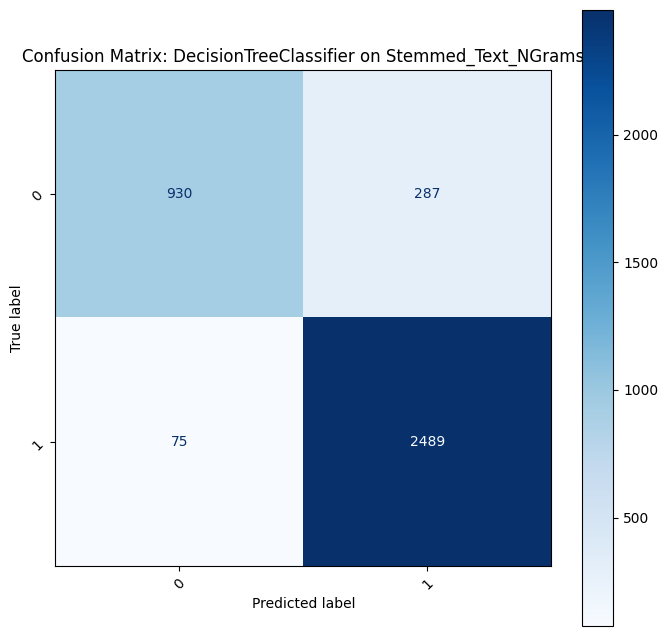

In [65]:
# Generateing a graphic confusion matrix for the best classifier and feature set combination
# This is done to see how the classifier performs on the different labels

# Generate the confusion matrix
cm = confusion_matrix(testing_label, pred)

# Create a figure to display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

# Create the Confusion Matrix Display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Use the `plot` method to display the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Customize the display
ax.set_title(f'Confusion Matrix: {clf_name} on {fs_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

# Show the plot
plt.show()


In [66]:
# Manually inspecting the results to find the 2nd best classifier and feature set combination

# Setting up all the required variables
vectorizer = TfidfVectorizer()
feature_column = "cleanTextLem"
clf = MultinomialNB()
train_features = vectorizer.fit_transform(training_data[feature_column])
test_features = vectorizer.transform(testing_data[feature_column])
clf_name = "MultinomialNB"
fs_name = "Lemmatized_Text_TFIDF"

# Create a pipeline
pipeline = Pipeline([
    ('classifier', clf)
])

# Fit the classifier
pipeline.fit(train_features, training_label)

# Predict and calculate scores
pred = pipeline.predict(test_features)
accuracy = accuracy_score(testing_label, pred)
f1 = f1_score(testing_label, pred, average='weighted')

# Store results
results.append((clf_name, fs_name, accuracy, f1))

# Print results
print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
print(f"  Accuracy: {accuracy:.3f}")
print(f"  F1 Score: {f1:.3f}\n")

Classifier: MultinomialNB, Feature Set: Lemmatized_Text_TFIDF
  Accuracy: 0.893
  F1 Score: 0.890



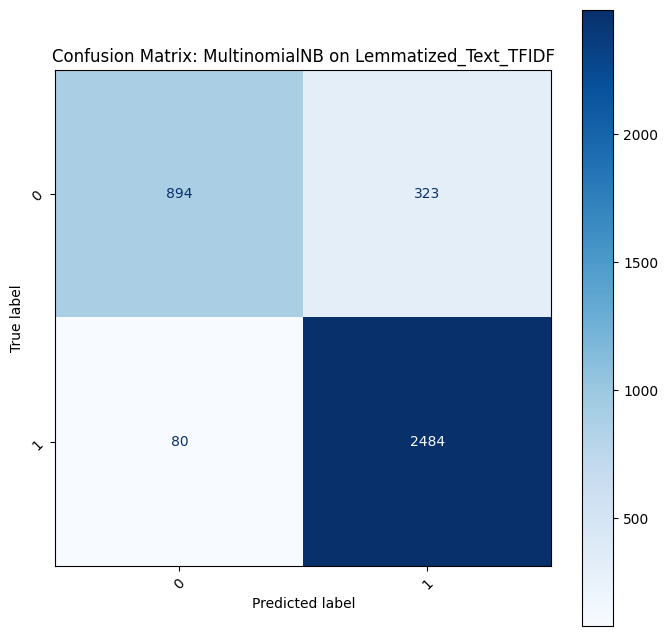

In [67]:
# Same as before, a graphic confusion matrix is generated for the 2nd best classifier and feature set combination

# Generate the confusion matrix
cm = confusion_matrix(testing_label, pred)

# Create a figure to display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

# Create the Confusion Matrix Display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Use the `plot` method to display the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Customize the display
ax.set_title(f'Confusion Matrix: {clf_name} on {fs_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

# Show the plot
plt.show()


In [68]:
# Setting up a pipline for grid search with MultinomialNB and TfidfVectorizer
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
}

In [69]:
# Configuring the broad grid search parameters
param_grids = {
    'MultinomialNB': {
        'vect__ngram_range': [(1, 1)],  # Including unigrams, bigrams, trigrams
        'vect__max_df': [0.25, 0.5, 0.75, 1.0],  # Extending the range
        'vect__min_df': [1, 2, 3, 5, 10],  # Extending the range
        'clf__alpha': [0.001, 0.01, 0.1, 0.5, 1.0]  # Extending the range
    }
}



In [70]:
# Conducting the grid search for MultinomialNB and TfidfVectorizer

for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=1, refit=True, cv=30)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
Fitting 30 folds for each of 100 candidates, totalling 3000 fits


F1 Score for training data: 90.611
F1 Score for testing data: 51.177
Best Parameters: {'clf__alpha': 0.5, 'vect__max_df': 0.75, 'vect__min_df': 2, 'vect__ngram_range': (1, 1)}



In [71]:
# Manual hyper parameter tuning for MultinomialNB and TfidfVectorizer
param_grids = {
    'MultinomialNB': {
        'vect__ngram_range': [(1, 1)], 
        'vect__max_df': [0.1],  
        'vect__min_df': [1], 
        'clf__alpha': [1.08]  
    }
}



In [72]:
# Getting the results for the manual hyper parameter tuning for MultinomialNB and TfidfVectorizer
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=1, refit=True, cv=30)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
Fitting 30 folds for each of 1 candidates, totalling 30 fits


F1 Score for training data: 91.024
F1 Score for testing data: 89.632
Best Parameters: {'clf__alpha': 1.08, 'vect__max_df': 0.1, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}



In [73]:
# Setting up a pipline for grid search with DecisionTreeClassifier and CountVectorizer
pipelines = {
    'DecisionTreeClassifier': Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 3))),
        ('clf', DecisionTreeClassifier(random_state=0))
    ]),
}

In [74]:
# Configuring the broad grid search parameters
param_grids = {
    'DecisionTreeClassifier': {
        'vect__max_df': [0.9, 1.0],  # Default for max_df is 1.0
        'vect__min_df': [1, 2],  # Default for min_df is 1
        'vect__ngram_range': [(1, 3)],  # Extending the range; default is (1, 1)
        'clf__criterion': ['gini'],  # Default is 'gini'
        'clf__max_depth': [None],  # Default is None
        'clf__min_samples_split': [2, 4,],  # Default is 2
        'clf__min_samples_leaf': [1, 2],  # Default is 1
        'clf__max_features': [None, 'sqrt', 'log2'],  # Default is None
    }
}



In [75]:
# Conducting the grid search for DecisionTreeClassifier and CountVectorizer
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=1, refit=True, cv=15)
    grid.fit(training_data['cleanTextStem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextStem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextStem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for DecisionTreeClassifier
Fitting 15 folds for each of 48 candidates, totalling 720 fits


F1 Score for training data: 98.718
F1 Score for testing data: 90.664
Best Parameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4, 'vect__max_df': 0.9, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}



In [76]:
# Manual hyper parameter tuning for DecisionTreeClassifier and CountVectorizer
param_grids = {
    'DecisionTreeClassifier': {
        'vect__max_df': [8],  # Default for max_df is 1.0
        'vect__min_df': [1 ],  # Default for min_df is 1
        'vect__ngram_range': [(1, 3)],  # Extending the range; default is (1, 1)
        'clf__criterion': ['gini'],  # Default is 'gini'
        'clf__max_depth': [None],  # Default is None
        'clf__min_samples_split': [5],  # Default is 2
        'clf__min_samples_leaf': [1],  # Default is 1
        'clf__max_features': [None],  # Default is None
    }
}



In [77]:
# Conducting the grid search for DecisionTreeClassifier and CountVectorizer
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=30)
    grid.fit(training_data['cleanTextStem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextStem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextStem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for DecisionTreeClassifier



KeyboardInterrupt



In [78]:
# Final display ofthe f1 scores for the selected feature sets, classifiers and hyper parameters
# Uses the final hyperpararmeters found in the previous cells

# Setting up all the required variables
feature_column = "cleanTextStem"
clf_name = "DecisionTreeClassifier"
fs_name = "Stemmed_Text_NGrams"

# Define the pipeline with the default hyperparameters
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),
    ('clf', DecisionTreeClassifier(random_state=0))
])

# Define a single set of hyperparameters for GridSearchCV (the best ones)
param_grid = {
    'clf__criterion': ['gini'],
    'clf__max_depth': [None],
    'clf__max_features': [None],
    'clf__min_samples_leaf': [1],
    'clf__min_samples_split': [5],
    'vect__max_df': [8],
    'vect__min_df': [1]
}

# Create a GridSearchCV object with 30-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='f1_weighted', cv=15, refit=True)

# Fit the GridSearchCV object on the training data
grid_search.fit(training_data[feature_column], training_label)

# The best_estimator_ attribute is the model retrained on the whole training set using the best found parameters
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
pred = best_model.predict(testing_data[feature_column])

# Calculate F1 score on the test set
f1_test = f1_score(testing_label, pred, average='weighted')

# Calculate accuracy on the test set
accuracy_test = accuracy_score(testing_label, pred)

# Store and print results
results.append((clf_name, fs_name, accuracy_test, f1_test))

print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
print(f"  Accuracy (Test Set): {accuracy_test:.3f}")
print(f"  F1 Score (Test Set): {f1_test:.3f}\n")

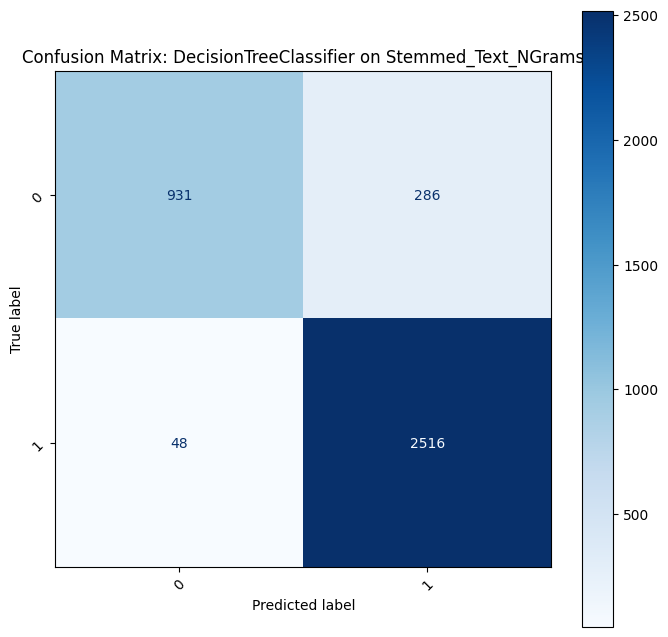

In [ ]:
# Generateing a graphic confusion matrix for the best classifier and feature set combination
# This is done to see how the classifier performs on the different labels

# Generate the confusion matrix
cm = confusion_matrix(testing_label, pred)

# Create a figure to display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

# Create the Confusion Matrix Display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Use the `plot` method to display the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Customize the display
ax.set_title(f'Confusion Matrix: {clf_name} on {fs_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

# Show the plot
plt.show()


In [ ]:
# Final display ofthe f1 scores for the selected feature sets, classifiers and hyper parameters
# Uses the final hyperpararmeters found in the previous cells

# Setting up all the required variables

# Setting up all the required variables
feature_column = "cleanTextLem"
clf_name = "MultinomialNB"
fs_name = "Lemmatized_Text_TFIDF"

# Define the pipeline with the specified hyperparameters
pipeline = Pipeline([
    ('vect', TfidfVectorizer(max_df=0.1)),
    ('clf', MultinomialNB(alpha=1.08))
])

# Perform 30-fold cross-validation for weighted F1 score
f1_scores = cross_val_score(pipeline, training_data[feature_column], training_label, scoring='f1_weighted', cv=30)

# Calculate average F1 score
average_f1_cv = f1_scores.mean()

# Train the final model on the entire training set
pipeline.fit(training_data[feature_column], training_label)

# Predict on the test set
pred = pipeline.predict(testing_data[feature_column])

# Calculate F1 score on the test set
f1_test = f1_score(testing_label, pred, average='weighted')

# Store and print results
results.append((clf_name, fs_name, f1_test))

print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
print(f"  Average F1 Score (CV): {average_f1_cv:.3f}")
print(f"  F1 Score (Test Set): {f1_test:.3f}\n")

Classifier: MultinomialNB, Feature Set: Lemmatized_Text_TFIDF
  Average F1 Score (CV): 0.827
  F1 Score (Test Set): 0.893



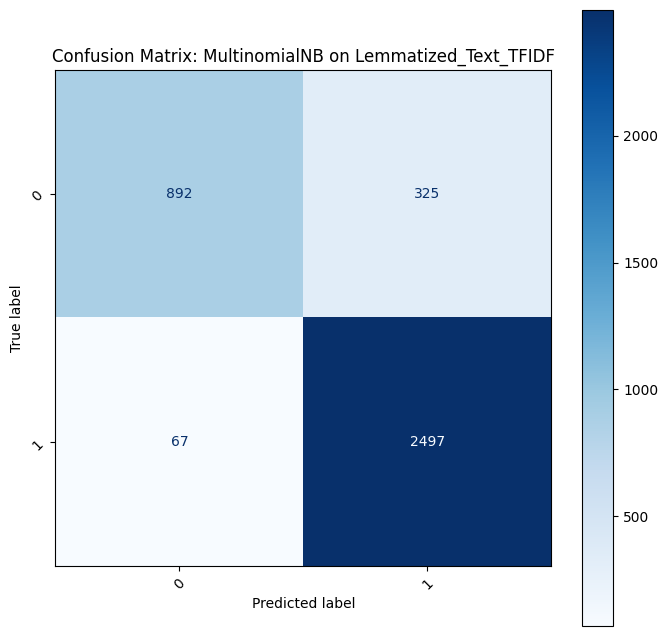

In [ ]:
# Same as before, a graphic confusion matrix is generated for the 2nd best classifier and feature set combination

# Generate the confusion matrix
cm = confusion_matrix(testing_label, pred)

# Create a figure to display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

# Create the Confusion Matrix Display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Use the `plot` method to display the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Customize the display
ax.set_title(f'Confusion Matrix: {clf_name} on {fs_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

# Show the plot
plt.show()


## Experimentation
The following code is not part of the pipeline but was included to show the experimentatin conducted.


In [ ]:
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
    'SGDClassifier': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', SGDClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression())
    ]),
    'BernoulliNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', BernoulliNB())
    ])
}

In [ ]:
param_grids = {
    'MultinomialNB': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [0.01, 0.1, 0.5, 1.0]
    },
    'SGDClassifier': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [1e-5, 1e-4, 1e-3],
        'clf__max_iter': [500, 1000, 2000],
        'clf__penalty': ['l2', 'l1', 'elasticnet'],
        'clf__loss': ['hinge', 'log', 'modified_huber']
    },
    'LogisticRegression': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l2', 'none'],
        'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
    },
    'BernoulliNB': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [0.01, 0.1, 0.5, 1.0]
    }
}



In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=30)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB


F1 Score for training data: 90.611
F1 Score for testing data: 51.177
Best Parameters: {'clf__alpha': 0.5, 'vect__max_df': 0.75, 'vect__min_df': 2, 'vect__ngram_range': (1, 1)}

Grid Search for SGDClassifier


KeyboardInterrupt: 

Grid Search for MultinomialNB
F1 Score for training data: 98.224
F1 Score for testing data: 51.851
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for SGDClassifier
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21870 fits failed out of a total of 65610.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1829 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'epsilon_insensitive', 'huber', 'log_loss', 'modified_huber', 'squared_epsilon_insensitive', 'squared_error', 'squared_hinge', 'perceptron', 'hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1812 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'log_loss', 'squared_epsilon_insensitive', 'modified_huber', 'squared_error', 'hinge', 'huber', 'epsilon_insensitive', 'squared_hinge', 'perceptron'}. Got 'log' instead.

--------------------------------------------------------------------------------
1805 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'huber', 'hinge', 'squared_error', 'epsilon_insensitive', 'squared_epsilon_insensitive', 'perceptron', 'squared_hinge', 'log_loss', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1829 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'modified_huber', 'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error', 'perceptron', 'hinge', 'log_loss', 'squared_hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1834 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'huber', 'modified_huber', 'squared_epsilon_insensitive', 'perceptron', 'epsilon_insensitive', 'log_loss', 'squared_error', 'squared_hinge', 'hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1810 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'log_loss', 'epsilon_insensitive', 'perceptron', 'hinge', 'modified_huber', 'huber', 'squared_error', 'squared_epsilon_insensitive', 'squared_hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1832 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'perceptron', 'log_loss', 'huber', 'squared_epsilon_insensitive', 'squared_error', 'hinge', 'squared_hinge', 'epsilon_insensitive', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1806 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'squared_hinge', 'squared_epsilon_insensitive', 'hinge', 'squared_error', 'huber', 'perceptron', 'epsilon_insensitive', 'log_loss', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1826 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'huber', 'squared_hinge', 'modified_huber', 'hinge', 'log_loss', 'squared_error', 'perceptron', 'epsilon_insensitive', 'squared_epsilon_insensitive'}. Got 'log' instead.

--------------------------------------------------------------------------------
1843 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'perceptron', 'squared_error', 'epsilon_insensitive', 'log_loss', 'modified_huber', 'hinge', 'squared_epsilon_insensitive', 'huber', 'squared_hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1793 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'epsilon_insensitive', 'squared_hinge', 'perceptron', 'log_loss', 'squared_error', 'hinge', 'huber', 'squared_epsilon_insensitive', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1851 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'squared_epsilon_insensitive', 'squared_error', 'modified_huber', 'hinge', 'log_loss', 'epsilon_insensitive', 'squared_hinge', 'huber', 'perceptron'}. Got 'log' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.86989585 0.86717447 0.86726103 ... 0.86717817 0.86295723 0.86313174]
  warnings.warn(
F1 Score for training data: 94.418
F1 Score for testing data: 84.714
Best Parameters: {'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}

Grid Search for LogisticRegression
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F1 Score for training data: 97.503
F1 Score for testing data: 84.261
Best Parameters: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for BernoulliNB
F1 Score for training data: 98.470
F1 Score for testing data: 52.863
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}

In [ ]:
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
    'BernoulliNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', BernoulliNB())
    ])
}

In [ ]:
param_grids = {
    'SGDClassifier': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [1e-5, 1e-4, 1e-3],
        'clf__max_iter': [500, 1000, 2000],
        'clf__penalty': ['l2', 'l1', 'elasticnet'],
        'clf__loss': ['hinge', 'log', 'modified_huber']
    },
    'LogisticRegression': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l2', 'none'],
        'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
    }
}



In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=30)
    grid.fit(training_data['cleanTextnoStop'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextnoStop'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextnoStop'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
F1 Score for training data: 92.440
F1 Score for testing data: 87.244
Best Parameters: {'clf__alpha': 1, 'vect__ngram_range': (1, 1)}

Grid Search for BernoulliNB
F1 Score for training data: 89.187
F1 Score for testing data: 87.457
Best Parameters: {'clf__alpha': 1.77, 'vect__ngram_range': (1, 1)}



In [ ]:
pipelines = {
    'SGDClassifier': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', SGDClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('clf', LogisticRegression())
    ]),
}

In [ ]:
param_grids = {
    'SGDClassifier': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5],
        'vect__min_df': [4],
        'clf__alpha': [1e-5,],
        'clf__max_iter': [500],
        'clf__penalty': ['l2'],
        'clf__loss': ['hinge']
    },
    'LogisticRegression': {
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l2'],
        'clf__solver': ['saga']
    }
}



In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=20)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for SGDClassifier
F1 Score for training data: 93.152
F1 Score for testing data: 81.145
Best Parameters: {'clf__alpha': 1e-05, 'clf__loss': 'hinge', 'clf__max_iter': 500, 'clf__penalty': 'l2', 'vect__max_df': 0.5, 'vect__min_df': 4, 'vect__ngram_range': (1, 1)}

Grid Search for LogisticRegression


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1208, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\pandas\core\series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'shark coming jerseyshore crazy hurricane sandy'

--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1208, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\pandas\core\series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'acuerdan película día después mañana recuerda pasando huracán sandy'


In [ ]:
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
    'DecisionTreeClassifierTfidf': Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
    ]),
    'DecisionTreeClassifierCount': Pipeline([
    ('vect', CountVectorizer()),
    ('clf', DecisionTreeClassifier())
    ])
}

In [ ]:
param_grid = {
    'MultinomialNB': {
        'vect__ngram_range': [(1, 1)],
        'clf__alpha': [1.48],  # Default value
    },
    'DecisionTreeClassifierTfidf': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__criterion': ['gini'],  # Default value
        'clf__max_depth': [None],  # Default value
        'clf__min_samples_split': [2],  # Default value
        'clf__min_samples_leaf': [1],  # Default value
    },
    'DecisionTreeClassifierCount': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'clf__criterion': ['gini'],  # Default value
        'clf__max_depth': [None, 10, 20, 50],
        'clf__min_samples_split': [2],  # Default value
        'clf__min_samples_leaf': [1],  # Default value
    }
}


In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=1, refit=True, cv=20)
    grid.fit(training_data['cleanTextStem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextStem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextStem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
Fitting 20 folds for each of 3 candidates, totalling 60 fits
F1 Score for training data: 88.415
F1 Score for testing data: 53.262
Best Parameters: {'clf__alpha': 1.48, 'vect__max_df': 1.0, 'vect__min_df': 5, 'vect__ngram_range': (1, 1)}

Grid Search for DecisionTreeClassifierTfidf
Fitting 20 folds for each of 9 candidates, totalling 180 fits
F1 Score for training data: 97.401
F1 Score for testing data: 62.956
Best Parameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'vect__max_df': 1.0, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}

Grid Search for DecisionTreeClassifierCount
Fitting 20 folds for each of 12 candidates, totalling 240 fits
F1 Score for training data: 87.887
F1 Score for testing data: 68.096
Best Parameters: {'clf__criterion': 'gini', 'clf__max_depth': 50, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'vect__ngram_range': (1, 1)}

